In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

EDA : BUSINEES

Las colunnas son business_id, name, address, city, state, postal_code, latitude, longitude, stars,review_count,is_open, attributes, categories, hours.

In [2]:
df_businees= pd.read_pickle(r"C:\Users\yanin\OneDrive\Desktop\proyecto final\archivos\yelp\business.pkl")
df_businees.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Cantidad de filas y columnas
df_businees.shape

(150346, 28)

In [4]:
# Ver los tipos de datos de cada columna
print(df_businees.dtypes)


business_id     object
name            object
address         object
city            object
state           object
postal_code     object
latitude        object
longitude       object
stars           object
review_count    object
is_open         object
attributes      object
categories      object
hours           object
business_id     object
name            object
address         object
city            object
state           object
postal_code     object
latitude        object
longitude       object
stars           object
review_count    object
is_open         object
attributes      object
categories      object
hours           object
dtype: object


In [5]:
# Mostrar información del DataFrame
print("\nInformación del DataFrame:")
df_businees.info()


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  s

In [6]:
# Mostrar las últimas filas del DataFrame
print("\nÚltimas filas del DataFrame:")
print(df_businees.tail())


Últimas filas del DataFrame:
                   business_id                      name  \
150341  IUQopTMmYQG-qRtBk-8QnA              Binh's Nails   
150342  c8GjPIOTGVmIemT7j5_SyQ      Wild Birds Unlimited   
150343  _QAMST-NrQobXduilWEqSw         Claire's Boutique   
150344  mtGm22y5c2UHNXDFAjaPNw  Cyclery & Fitness Center   
150345  jV_XOycEzSlTx-65W906pg                   Sic Ink   

                       address          city state postal_code   latitude  \
150341       3388 Gateway Blvd      Edmonton    IN     T6J 5H2  53.468419   
150342      2813 Bransford Ave     Nashville    DE       37204  36.115118   
150343  6020 E 82nd St, Ste 46  Indianapolis    AB       46250  39.908707   
150344            2472 Troy Rd  Edwardsville    AB       62025  38.782351   
150345   238 Apollo Beach Blvd  Apollo beach    TN       33572  27.771002   

         longitude stars review_count  ... state postal_code latitude  \
150341 -113.492054   3.0           13  ...   NaN         NaN      NaN   


In [7]:
# Eliminar columnas duplicadas por nombre
df_businees= df_businees.loc[:, ~df_businees.columns.duplicated()]


verificar nulos o faltantes y eliminar o modificar segun sea conveniemte

In [8]:
# Verificar la cantidad de valores nulos por columna
df_businees.isnull().sum()



business_id         0
name                0
address             0
city                0
state               3
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [9]:
# Porcentaje de valores nulos por columna
(df_businees.isnull().mean() * 100)

business_id      0.000000
name             0.000000
address          0.000000
city             0.000000
state            0.001995
postal_code      0.000000
latitude         0.000000
longitude        0.000000
stars            0.000000
review_count     0.000000
is_open          0.000000
attributes       9.141580
categories       0.068509
hours           15.446370
dtype: float64

modificacion de tipo de datos 

In [10]:
# Convertir las columnas específicas a tipo 'string'
columnas_string = ['business_id', 'name', 'address', 'city', 'state', 'postal_code']

# Convertir las columnas seleccionadas a tipo string
df_businees[columnas_string] = df_businees[columnas_string].astype('string')

# Verificar las columnas de tipo string después de la conversión
print(df_businees.select_dtypes(include=['string']).columns)


Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code'], dtype='object')


In [11]:
# Lista de columnas que deberían ser numéricas
columnas_numericas = ['stars', 'review_count', 'latitude', 'longitude','is_open']  # Ajusta los nombres de las columnas según tu DataFrame

# Convertir todas las columnas mencionadas a tipo numérico
for columna in columnas_numericas:
    df_businees[columna] = pd.to_numeric(df_businees[columna], errors='coerce')

# Verificar si las columnas se han convertido correctamente a numéricas
print(df_businees.select_dtypes(include=[np.number]).columns)


Index(['latitude', 'longitude', 'stars', 'review_count', 'is_open'], dtype='object')


In [12]:
# Convertir 'attributes' de diccionario a cadena de texto (clave: valor)
df_businees['attributes'] = df_businees['attributes'].apply(lambda x: str(x) if isinstance(x, dict) else x)

# Convertir 'categories' de lista a cadena de texto separada por comas
df_businees['categories'] = df_businees['categories'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Convertir 'hours' de diccionario a cadena de texto (formato 'key: value')
df_businees['hours'] = df_businees['hours'].apply(lambda x: str(x) if isinstance(x, dict) else x)

# Verificar los cambios en las columnas
print(df_businees[['attributes', 'categories', 'hours']].head())


                                          attributes  \
0                      {'ByAppointmentOnly': 'True'}   
1             {'BusinessAcceptsCreditCards': 'True'}   
2  {'BikeParking': 'True', 'BusinessAcceptsCredit...   
3  {'RestaurantsDelivery': 'False', 'OutdoorSeati...   
4  {'BusinessAcceptsCreditCards': 'True', 'Wheelc...   

                                          categories  \
0  Doctors, Traditional Chinese Medicine, Naturop...   
1  Shipping Centers, Local Services, Notaries, Ma...   
2  Department Stores, Shopping, Fashion, Home & G...   
3  Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
4                          Brewpubs, Breweries, Food   

                                               hours  
0                                               None  
1  {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...  
2  {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...  
3  {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...  
4  {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..

In [13]:
# Verificar los tipos de datos después de la conversión
print(df_businees.dtypes)


business_id     string[python]
name            string[python]
address         string[python]
city            string[python]
state           string[python]
postal_code     string[python]
latitude               float64
longitude              float64
stars                  float64
review_count             int64
is_open                  int64
attributes              object
categories              object
hours                   object
dtype: object


estadisticas y visualizacion de valores atipicos

In [14]:
# Estadísticas descriptivas para columnas numéricas
df_businees.describe() 

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


Stars (Calificación):
 * Promedio: La calificación promedio de los negocios es de 3.59 estrellas, lo que sugiere que la mayoría de los negocios tienen una calificación decente, aunque no sobresaliente.
 * Distribución: La desviación estándar de 0.97 indica que las calificaciones están relativamente dispersas alrededor de la media. Hay negocios con calificaciones desde 1 estrella (mínimo) hasta 5 estrellas (máximo).
 * Mediana: La mediana de 3.5 estrellas es muy cercana al promedio, lo que refuerza la idea de que la distribución de calificaciones es bastante simétrica.
Review_count (Cantidad de Reseñas):
 * Promedio: En promedio, los negocios tienen alrededor de 44.87 reseñas.
 * Dispersión: La desviación estándar es muy alta (121.12), lo que indica una gran variabilidad en la cantidad de reseñas. Algunos negocios tienen muy pocas reseñas, mientras que otros tienen cientos o incluso miles.
 * Valores Extremos: El valor máximo de 7568 reseñas sugiere que hay negocios muy populares con una gran cantidad de opiniones

In [15]:


# Calculamos el Z-score para las columnas numéricas
z_scores = np.abs(zscore(df_businees.select_dtypes(include=[np.number])))

# Identificamos los outliers. Se consideran outliers aquellos con Z-score > 3
outliers_zscore = np.where(z_scores > 3)

# Mostrar los índices de los outliers detectados
print("\nOutliers identificados usando el método Z-score:")
print(outliers_zscore)

# Mostrar los valores atípicos en el DataFrame
outliers_data = df_businees.iloc[outliers_zscore[0]]
print("\nValores atípicos en el DataFrame:")
print(outliers_data)



Outliers identificados usando el método Z-score:
(array([    89,    112,    141, ..., 150249, 150285, 150323], shape=(1942,)), array([3, 3, 3, ..., 3, 3, 3], shape=(1942,)))

Valores atípicos en el DataFrame:
                   business_id                                         name  \
89      oaboaRBUgGjbo2kfUIKDLQ                             Mike's Ice Cream   
112     sB45WFgysT617bKWP_WJwA                 Budweiser Brewery Experience   
141     SZU9c8V2GuREDN5KgyHFJw              Santa Barbara Shellfish Company   
181     ORL4JE6tz3rJxVqkdKfegA  Gaylord Opryland Resort & Convention Center   
319     f82dhKNiUXsDVPMLqKYiIQ                                Sher-e-Punjab   
...                        ...                                          ...   
150214  2xxkaRy7rP5EUyjFt2J5kA                                  Nikka Ramen   
150235  mzTTdvQGkUHZ8ii7OnZC5w                                 Trader Joe's   
150249  8MzF1Tlgz0pOkxmhP5dYzA                            El Cap Restaurant   


In [16]:
# Calcular el rango intercuartílico (IQR) para 'stars'
Q1_stars = df_businees["stars"].quantile(0.25)
Q3_stars = df_businees["stars"].quantile(0.75)
IQR_stars = Q3_stars - Q1_stars

# Definir los límites para detectar outliers en 'stars'
lower_bound_stars = Q1_stars - 1.5 * IQR_stars
upper_bound_stars = Q3_stars + 1.5 * IQR_stars

# Filtrar los valores atípicos en 'stars'
outliers_stars = df_businees[(df_businees["stars"] < lower_bound_stars) | (df_businees["stars"] > upper_bound_stars)]

# Mostrar los valores atípicos detectados en 'stars'
print("Valores atípicos en 'stars':")
print(outliers_stars)



Valores atípicos en 'stars':
Empty DataFrame
Columns: [business_id, name, address, city, state, postal_code, latitude, longitude, stars, review_count, is_open, attributes, categories, hours]
Index: []


In [17]:

# Calcular el rango intercuartílico (IQR) para 'review_count'
Q1_review_count = df_businees["review_count"].quantile(0.25)
Q3_review_count = df_businees["review_count"].quantile(0.75)
IQR_review_count = Q3_review_count - Q1_review_count

# Definir los límites para detectar outliers en 'review_count'
lower_bound_review_count = Q1_review_count - 1.5 * IQR_review_count
upper_bound_review_count = Q3_review_count + 1.5 * IQR_review_count

# Filtrar los valores atípicos en 'review_count'
outliers_review_count = df_businees[(df_businees["review_count"] < lower_bound_review_count) | (df_businees["review_count"] > upper_bound_review_count)]

# Mostrar los valores atípicos detectados en 'review_count'
print("Valores atípicos en 'review_count':")
print(outliers_review_count)

Valores atípicos en 'review_count':
                   business_id                          name  \
14      0bPLkL0QhhPO5kt1_EXmNQ          Zio's Italian Market   
15      MUTTqe8uqyMdBl186RmNeA                      Tuna Bar   
19      ROeacJQwBeh05Rqg7F6TCg                           BAP   
23      9OG5YkX1g2GReZM0AskizA       Romano's Macaroni Grill   
27      tMkwHmWFUEXrC9ZduonpTg            The Green Pheasant   
...                        ...                           ...   
150285  fWeWzB9STxcX40AgSEQVcw  Arizona-Sonora Desert Museum   
150290  uriD7RFuHhLJeDdKaf0nFA                    Pizza Guru   
150296  lCo7sEuxlfFeT-nAOR-sbA                   Apple Store   
150322  2MAQeAqmD8enCT2ZYqUgIQ   The Melting Pot - Nashville   
150323  w_4xUt-1AyY2ZwKtnjW0Xg          Bittercreek Alehouse   

                            address           city state postal_code  \
14                    2575 E Bay Dr          Largo    FL       33771   
15                      205 Race St   Philadelphia 

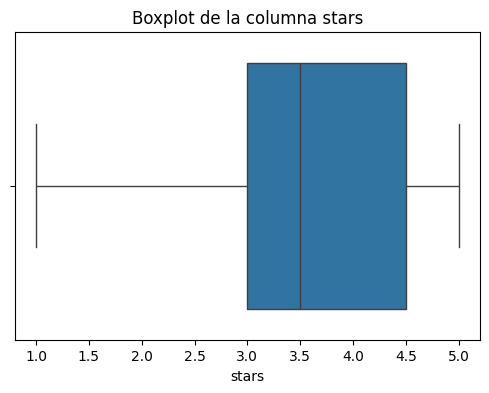

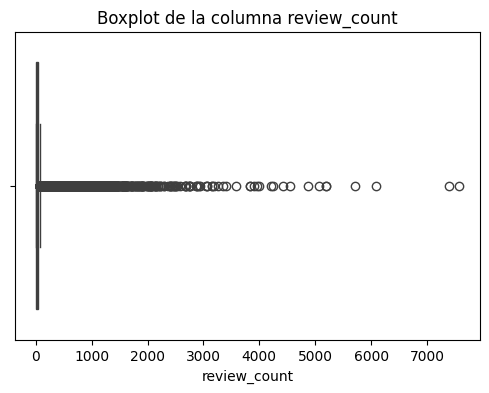

In [18]:
# Visualizar boxplot para las columnas 'stars' y 'review_count'
columnas_a_graficar = ['stars', 'review_count']  # Especificamos las columnas que queremos graficar

for columna in columnas_a_graficar:
    if columna in df_businees.columns:  # Aseguramos que la columna exista en el DataFrame
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df_businees[columna])
        plt.title(f"Boxplot de la columna {columna}")
        plt.show()
    else:
        print(f"La columna '{columna}' no está presente en el DataFrame.")

boxplot de columnas review_count:
*Distribución Asimétrica: La caja del boxplot está muy comprimida hacia la izquierda, lo que indica que la distribución de "review_count" está fuertemente sesgada hacia valores bajos. Esto significa que la mayoría de los negocios tienen un número relativamente pequeño de reseñas.
Presencia de Outliers: Se observan numerosos puntos individuales (outliers) a la derecha del boxplot, extendiéndose hasta valores muy altos de "review_count". Estos outliers representan negocios con un número excepcionalmente grande de reseñas en comparación con la mayoría.
*Mediana Baja: La línea dentro de la caja (que representa la mediana) está ubicada cerca del extremo izquierdo de la caja. Esto refuerza la idea de que la mayoría de los negocios tienen un número bajo de reseñas.
*Rango Intercuartílico (IQR) Pequeño: La caja del boxplot, que representa el IQR (el rango entre el percentil 25 y el percentil 75), es relativamente pequeña. Esto sugiere que la mayoría de los negocios tienen un número de reseñas que no varía mucho entre sí, pero hay algunos que se disparan.

Boxplot de colunna"stars":
 * Rango de Calificaciones: La caja del boxplot se extiende desde aproximadamente 3.0 hasta 4.5 en el eje de "stars". Esto indica que la mayoría de los negocios en el conjunto de datos tienen calificaciones entre 3.0 y 4.5 estrellas.
 * Mediana: La línea dentro de la caja (que representa la mediana) está ubicada cerca de 3.75. Esto sugiere que el valor central de las calificaciones de los negocios está alrededor de 3.75 estrellas.
 * Distribución Relativamente Simétrica: La caja del boxplot parece ser relativamente simétrica, lo que indica que la distribución de las calificaciones es bastante uniforme alrededor de la mediana.
 * Ausencia de Outliers Significativos: No se observan outliers significativos en el boxplot. Esto sugiere que no hay negocios con calificaciones extremadamente altas o bajas en comparación con la mayoría.

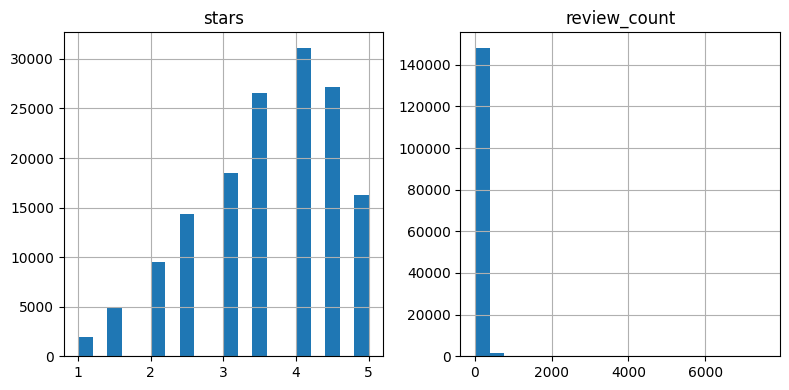

In [19]:
import matplotlib.pyplot as plt

# Seleccionar las columnas 'stars' y 'review_count'
df_businees[['stars', 'review_count']].hist(bins=20, figsize=(8, 4))

# Ajustar la disposición del gráfico
plt.tight_layout()

# Mostrar los histogramas
plt.show()


Histograma de "stars":
 * Distribución Asimétrica a la Izquierda: El histograma de "stars" muestra una distribución asimétrica a la izquierda (sesgada a la derecha). Esto significa que la mayoría de los negocios tienen calificaciones altas (entre 3 y 5 estrellas), mientras que hay relativamente pocos negocios con calificaciones bajas (1 y 2 estrellas).
 * Pico en 4 Estrellas: El pico más alto del histograma se encuentra en 4 estrellas, lo que indica que esta es la calificación más común entre los negocios en el conjunto de datos.
 * Baja Frecuencia de Calificaciones Bajas: La frecuencia de negocios con calificaciones de 1 y 2 estrellas es significativamente menor en comparación con las calificaciones más altas.
Histograma de "review_count":
 * Distribución Extremadamente Asimétrica a la Derecha: El histograma de "review_count" muestra una distribución extremadamente asimétrica a la derecha (sesgada a la izquierda). Esto significa que la gran mayoría de los negocios tienen un número muy bajo de reseñas, mientras que hay algunos negocios con un número excepcionalmente alto de reseñas.
 * Pico en Valores Cercanos a Cero: El pico más alto del histograma se encuentra en valores cercanos a cero, lo que indica que la mayoría de los negocios tienen muy pocas reseñas.
 * Cola Larga: La cola larga del histograma se extiende hasta valores muy altos de "review_count", lo que indica la presencia de outliers o negocios con un número excepcionalmente alto de reseñas.
 Conclusiones Conjuntas:
 * Calificaciones Altas Predominantes: La mayoría de los negocios en el conjunto de datos tienen calificaciones altas (3 a 5 estrellas), lo que sugiere que los clientes tienden a estar satisfechos con los negocios en general.
 * Número de Reseñas Variable: El número de reseñas varía enormemente entre los negocios. La mayoría de los negocios tienen muy pocas reseñas, mientras que algunos tienen un número excepcionalmente alto.
 * Posible Influencia del Número de Reseñas en las Calificaciones: Sería interesante investigar si existe una relación entre el número de reseñas y las calificaciones. ¿Los negocios con más reseñas tienden a tener calificaciones más altas?


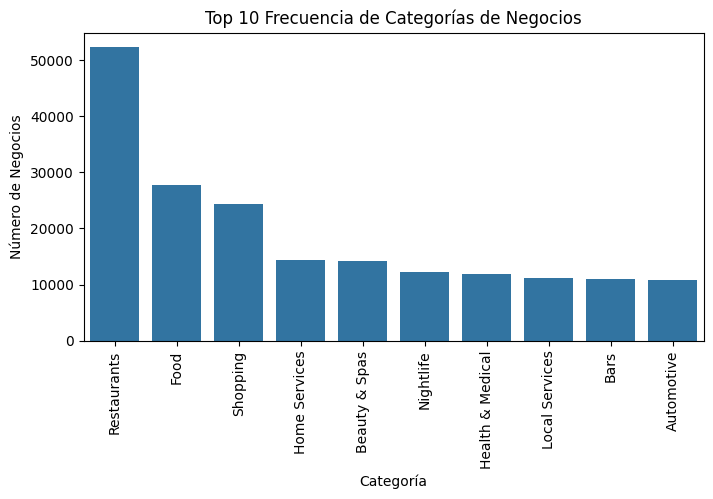

In [20]:

# Eliminar filas con 'NaN' en la columna 'categories'
df_businees = df_businees.dropna(subset=['categories'])

# Convertir las cadenas separadas por comas en listas
df_businees['categories'] = df_businees['categories'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)

# Expansión de la columna 'categories' que es una lista
categories_expanded = df_businees['categories'].explode()  # Convertir cada lista en filas separadas

# Contamos la frecuencia de cada categoría
category_counts = categories_expanded.value_counts()

# Limitar el número de categorías a las 10 más frecuentes
category_counts_top_10 = category_counts.head(10)

# Visualizamos los resultados con un gráfico de barras
plt.figure(figsize=(8, 4))
sns.barplot(x=category_counts_top_10.index, y=category_counts_top_10.values)
plt.title('Top 10 Frecuencia de Categorías de Negocios')
plt.xlabel('Categoría')
plt.ylabel('Número de Negocios')
plt.xticks(rotation=90)  # Rota las etiquetas del eje X para mejor visualización
plt.show()


Dominio de Restaurantes: La categoría "Restaurants" es la más frecuente, con un número significativamente mayor de negocios en comparación con las demás categorías. Esto indica que los restaurantes son una parte importante del conjunto de datos.
Presencia de Negocios Relacionados con la Comida: Las categorías "Food" y "Restaurants" son las dos más frecuentes, lo que sugiere que los negocios relacionados con la comida son muy comunes en el conjunto de datos.
Diversidad de Categorías: El gráfico muestra una variedad de categorías de negocios, desde servicios locales y para el hogar hasta belleza y spas, salud y medicina, compras, vida nocturna, bares y automoción. Esto indica que el conjunto de datos cubre una amplia gama de tipos de negocios.
Disminución Gradual de la Frecuencia: La frecuencia de las categorías disminuye gradualmente a medida que avanzamos de izquierda a derecha en el gráfico. Esto sugiere que hay una jerarquía en la frecuencia de las categorías, con algunas categorías siendo mucho más comunes que otras.

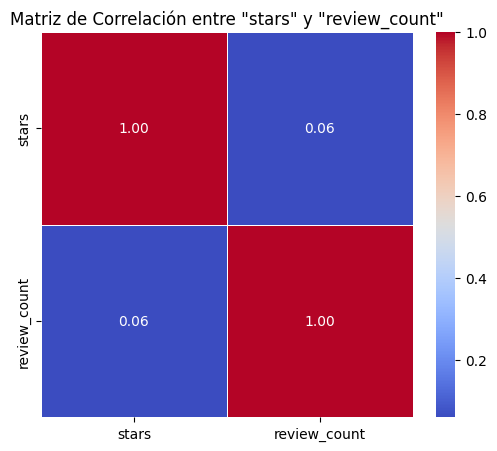

In [21]:


# Seleccionamos solo las columnas 'stars' y 'review_count'
df_subset = df_businees[['stars', 'review_count']]

# Calculamos la matriz de correlación entre 'stars' y 'review_count'
correlation_matrix = df_subset.corr()

# Visualizamos la matriz de correlación con un mapa de calor
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre "stars" y "review_count"')
plt.show()


La matriz de correlación muestra que no hay una relación lineal fuerte entre las calificaciones de los negocios y el número de reseñas que reciben. La correlación de 0.06 sugiere que las dos variables son prácticamente independientes entre sí. Sin embargo, esto no descarta la posibilidad de relaciones no lineales o la influencia de otros factores

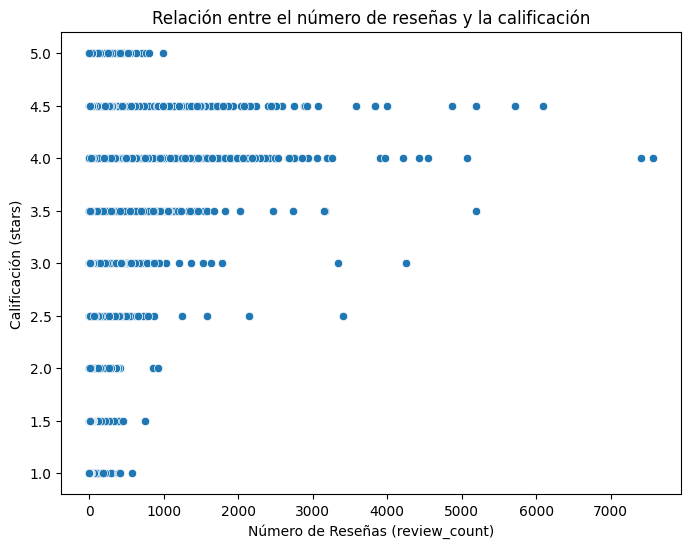

Correlación de Pearson entre 'review_count' y 'stars': 0.05964636979419793


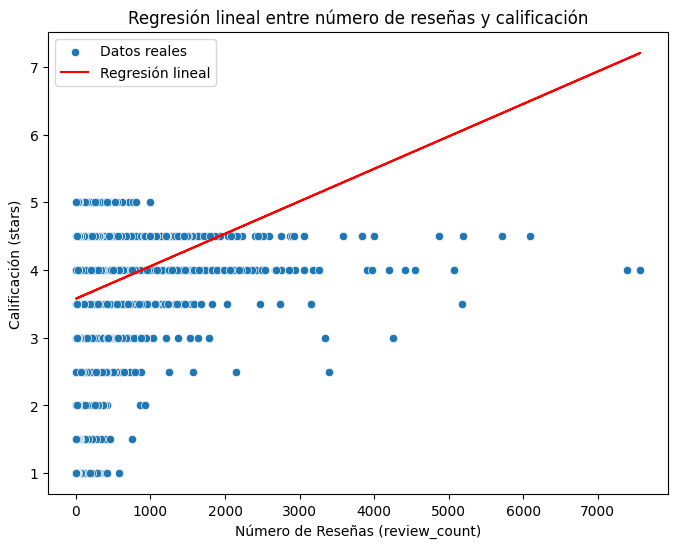

In [22]:

# Gráfico de dispersión para observar la relación entre 'review_count' y 'stars'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_businees, x='review_count', y='stars')
plt.title('Relación entre el número de reseñas y la calificación')
plt.xlabel('Número de Reseñas (review_count)')
plt.ylabel('Calificación (stars)')
plt.show()

# Calcular la correlación de Pearson entre 'review_count' y 'stars'
correlacion = df_businees['review_count'].corr(df_businees['stars'])

print(f"Correlación de Pearson entre 'review_count' y 'stars': {correlacion}")

# Si la correlación es baja, se puede verificar la relación usando una regresión lineal simple:
import numpy as np
from sklearn.linear_model import LinearRegression

# Reshape para que sea compatible con el modelo de regresión
X = df_businees['review_count'].values.reshape(-1, 1)  # Número de reseñas
y = df_businees['stars'].values  # Calificación

# Crear el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Predicciones del modelo
predicciones = modelo.predict(X)

# Graficar la regresión lineal
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_businees, x='review_count', y='stars', label='Datos reales')
plt.plot(df_businees['review_count'], predicciones, color='red', label='Regresión lineal')
plt.title('Regresión lineal entre número de reseñas y calificación')
plt.xlabel('Número de Reseñas (review_count)')
plt.ylabel('Calificación (stars)')
plt.legend()
plt.show()


El gráfico de dispersión muestra que no hay una relación lineal fuerte entre el número de reseñas y la calificación de los negocios. La mayoría de los negocios tienen calificaciones altas, independientemente del número de reseñas. Esto sugiere que otros factores, además del número de reseñas, juegan un papel importante en la determinación de las calificaciones.

El gráfico de regresión lineal muestra que no hay una relación lineal fuerte entre el número de reseñas y la calificación de los negocios. La línea de regresión lineal no se ajusta bien a los datos, lo que sugiere que un modelo lineal no es adecuado para modelar esta relación. Esto indica que otros factores, además del número de reseñas, juegan un papel importante en la determinación de las calificaciones

In [23]:
df_businees.to_pickle(r"C:\Users\yanin\OneDrive\Desktop\proyecto final\archivos\yelp\business_modificado.pkl")


CONCLUSION FINAL :Calificaciones Altas Predominantes: La mayoría de los negocios en el conjunto de datos tienen calificaciones altas (entre 3 y 5 estrellas), lo que sugiere que los clientes están generalmente satisfechos con los negocios.

Número de Reseñas Variable: El número de reseñas varía enormemente entre los negocios, con la mayoría de los negocios teniendo pocas reseñas y unos pocos con una cantidad excepcionalmente alta.


Categorías de Negocios:
Dominio de Restaurantes: La categoría más frecuente es "Restaurants", con un número significativamente mayor de negocios en comparación con otras categorías. Esto indica que los restaurantes son una parte importante del conjunto de datos.

Presencia de Negocios Relacionados con la Comida: Las categorías "Food" y "Restaurants" son las dos más frecuentes, lo que indica que los negocios relacionados con la comida son comunes en el conjunto de datos.

Diversidad de Categorías: El gráfico muestra una variedad de categorías de negocios, desde servicios locales y para el hogar hasta belleza y spas, salud y medicina, compras, vida nocturna, bares y automoción. Esto sugiere que el conjunto de datos cubre una amplia gama de tipos de negocios.

Disminución Gradual de la Frecuencia: La frecuencia de las categorías disminuye gradualmente a medida que avanzamos de izquierda a derecha en el gráfico. Esto sugiere que hay algunas categorías dominantes y otras menos representadas.

Matriz de Correlación:
Baja Correlación entre Calificaciones y Reseñas: La matriz de correlación muestra que no hay una relación lineal fuerte entre las calificaciones (stars) y el número de reseñas (review_count), con un valor de correlación de 0.06. Esto indica que las dos variables son prácticamente independientes entre sí.

Posibles Relaciones No Lineales o Influencia de Otros Factores: Aunque no hay una correlación lineal fuerte, esto no descarta la posibilidad de que existan relaciones no lineales o que otros factores, no considerados en el análisis, puedan influir en estas variables.

EDA CKECKIN

In [24]:

# Cargar el archivo checkin.json con lines=True
df_checkins = pd.read_json(r"C:/Users/yanin/OneDrive/Desktop/proyecto final/archivos/yelp/checkin.json", lines=True)

# Ver las primeras filas del DataFrame para asegurarnos de que está correctamente cargado
df_checkins.head()


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [25]:


# Verificar los valores faltantes/nulos en cada columna
print("Valores nulos por columna:")
print(df_checkins.isnull().sum())

# Verificar las filas duplicadas
print("\nNúmero de filas duplicadas:")
print(df_checkins.duplicated().sum())

# Ver un resumen general de los datos faltantes y duplicados
print("\nResumen de los datos:")
summary = {
    "Total filas": df_checkins.shape[0],
    "Total columnas": df_checkins.shape[1],
    "Filas con valores nulos": df_checkins.isnull().any(axis=1).sum(),
    "Total valores nulos": df_checkins.isnull().sum().sum(),
    "Filas duplicadas": df_checkins.duplicated().sum(),
    "Filas únicas": df_checkins.drop_duplicates().shape[0]
}

for key, value in summary.items():
    print(f"{key}: {value}")


Valores nulos por columna:
business_id    0
date           0
dtype: int64

Número de filas duplicadas:
0

Resumen de los datos:
Total filas: 131930
Total columnas: 2
Filas con valores nulos: 0
Total valores nulos: 0
Filas duplicadas: 0
Filas únicas: 131930


In [26]:


# Definir el tamaño de cada fragmento
chunk_size = 100000  # Por ejemplo, 100,000 filas por vez

# Lista para almacenar los fragmentos procesados
chunk_list = []

# Leer los datos en fragmentos, asegurándose de que cada línea sea un JSON independiente
for chunk in pd.read_json(r"C:/Users/yanin/OneDrive/Desktop/proyecto final/archivos/yelp/checkin.json", lines=True, chunksize=chunk_size):
    # Dividir las fechas por coma
    chunk['date'] = chunk['date'].str.split(', ')
    
    # Expandir las fechas
    chunk_expanded = chunk.explode('date')
    
    # Convertir las fechas a datetime
    chunk_expanded['date'] = pd.to_datetime(chunk_expanded['date'])
    
    # Agregar el fragmento procesado a la lista
    chunk_list.append(chunk_expanded)

# Concatenar todos los fragmentos procesados en un solo DataFrame
df_checkins_expanded = pd.concat(chunk_list, ignore_index=True)

# Mostrar las primeras filas del DataFrame procesado
df_checkins_expanded.head()


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,2020-03-13 21:10:56
1,---kPU91CF4Lq2-WlRu9Lw,2020-06-02 22:18:06
2,---kPU91CF4Lq2-WlRu9Lw,2020-07-24 22:42:27
3,---kPU91CF4Lq2-WlRu9Lw,2020-10-24 21:36:13
4,---kPU91CF4Lq2-WlRu9Lw,2020-12-09 21:23:33


In [27]:
# Contar la cantidad de check-ins por negocio
checkins_per_business = df_checkins_expanded.groupby('business_id').size().reset_index(name='checkin_count')

# Mostrar los primeros negocios con más check-ins
checkins_per_business.sort_values(by='checkin_count', ascending=False).head()


,business_id,checkin_count
878,-QI8Qi8XWH3D8y8ethnajA,52144
33681,FEXhWNCMkv22qG04E83Qjg,40109
32401,Eb1XmmLWyt_way5NNZ7-Pw,37562
83440,c_4c5rJECZSfNgFj7frwHQ,37518
11840,4i4kmYm9wgSNyF1b6gKphg,31168


C:\Users\yanin\AppData\Local\Temp\ipykernel_19668\1530366447.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='checkin_count', y='business_id', data=checkins_per_business.sort_values(by='checkin_count', ascending=False).head(20), palette='viridis')


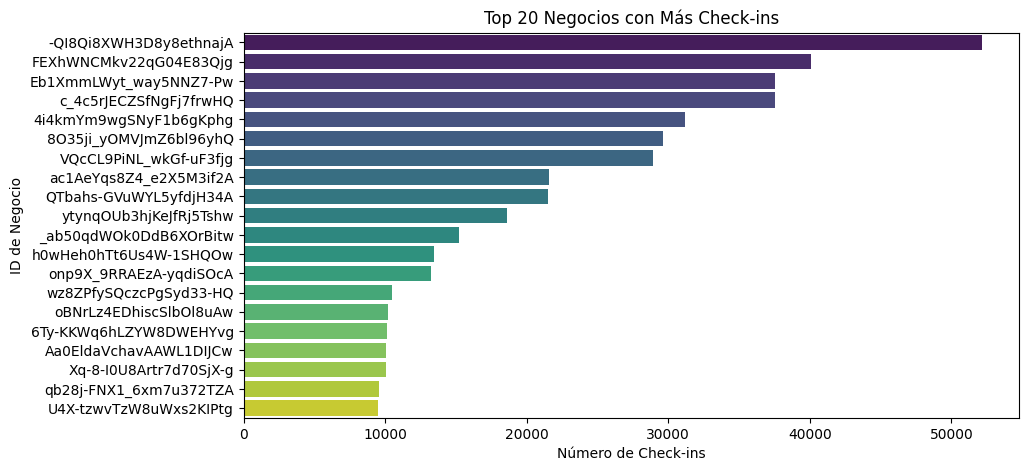

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la distribución de los check-ins por negocio
plt.figure(figsize=(10,5))
sns.barplot(x='checkin_count', y='business_id', data=checkins_per_business.sort_values(by='checkin_count', ascending=False).head(20), palette='viridis')
plt.title('Top 20 Negocios con Más Check-ins')
plt.xlabel('Número de Check-ins')
plt.ylabel('ID de Negocio')
plt.show()


El gráfico permite identificar rápidamente los negocios con el mayor número de check-ins. Los negocios en la parte superior del gráfico tienen barras más largas, lo que indica un mayor número de visitas registradas. La gradación de color también ayuda a visualizar la distribución de los check-ins entre los diferentes negocios.

In [29]:
# Imprimir las primeras filas del DataFrame y las columnas para verificar la columna correcta
print(df_checkins_expanded.head())
print(df_checkins_expanded.columns)


              business_id                date
0  ---kPU91CF4Lq2-WlRu9Lw 2020-03-13 21:10:56
1  ---kPU91CF4Lq2-WlRu9Lw 2020-06-02 22:18:06
2  ---kPU91CF4Lq2-WlRu9Lw 2020-07-24 22:42:27
3  ---kPU91CF4Lq2-WlRu9Lw 2020-10-24 21:36:13
4  ---kPU91CF4Lq2-WlRu9Lw 2020-12-09 21:23:33
Index(['business_id', 'date'], dtype='object')


C:\Users\yanin\AppData\Local\Temp\ipykernel_19668\603912950.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='checkin_count', data=checkins_by_day, palette='Blues_d')


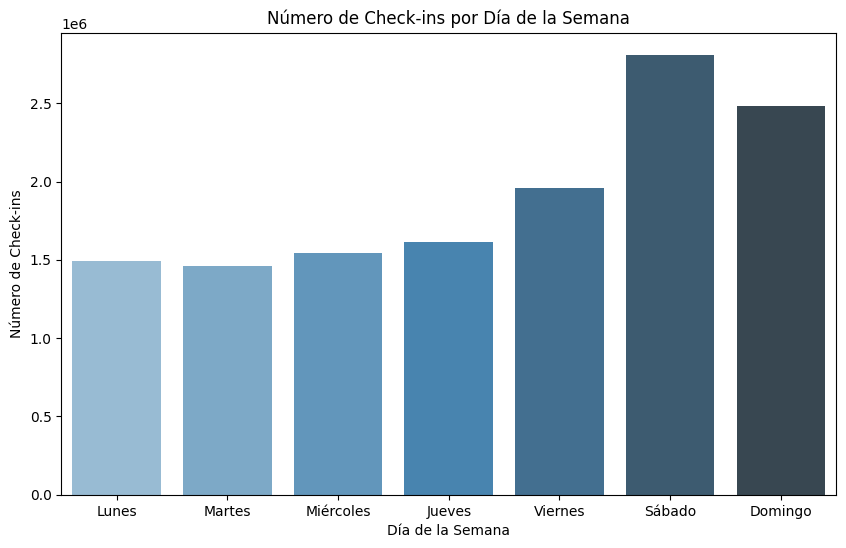

In [30]:
# Convertir la columna a tipo datetime si no lo está
df_checkins_expanded['date'] = pd.to_datetime(df_checkins_expanded['date'])

# Extraer el día de la semana
df_checkins_expanded['day_of_week'] = df_checkins_expanded['date'].dt.dayofweek
# Contar los check-ins por día de la semana
checkins_by_day = df_checkins_expanded.groupby('day_of_week').size().reset_index(name='checkin_count')

# Mapear los números de los días a nombres de días de la semana
checkins_by_day['day_of_week'] = checkins_by_day['day_of_week'].map({
    0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'
})

# Visualizar la distribución de check-ins por día de la semana
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='checkin_count', data=checkins_by_day, palette='Blues_d')
plt.title('Número de Check-ins por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Check-ins')
plt.show()


El gráfico muestra claramente la distribución de los check-ins a lo largo de la semana. Se observa que los sábados y domingos tienen el mayor número de check-ins, seguidos de los viernes. Los días de semana (lunes a jueves) tienen un número de check-ins relativamente menor.

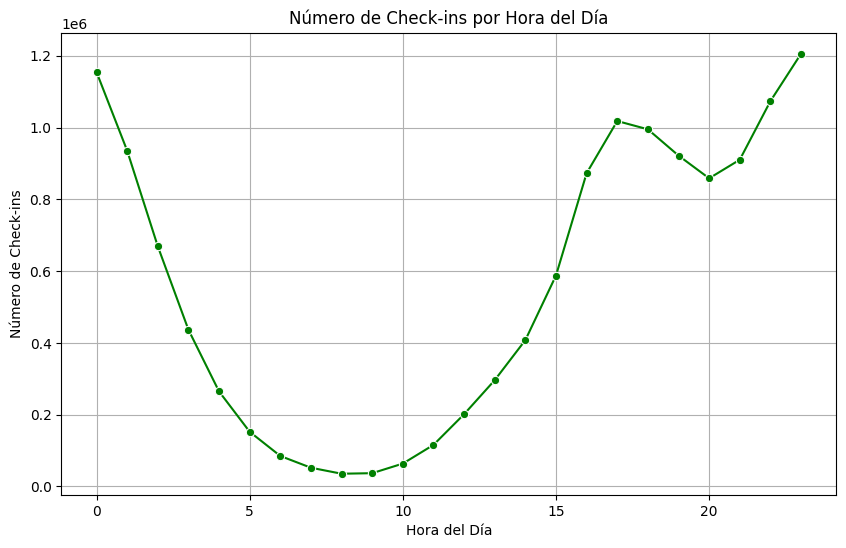

In [31]:
df_checkins_expanded['date'] = pd.to_datetime(df_checkins_expanded['date'])
df_checkins_expanded['hour_of_day'] = df_checkins_expanded['date'].dt.hour

# Extraer la hora del día de los check-ins
#df_checkins_expanded['hour_of_day'] = df_checkins_expanded['checkin_datetime'].dt.hour

# Contar los check-ins por hora del día
checkins_by_hour = df_checkins_expanded.groupby('hour_of_day').size().reset_index(name='checkin_count')

# Visualizar la distribución de check-ins por hora del día
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour_of_day', y='checkin_count', data=checkins_by_hour, marker='o', color='green')
plt.title('Número de Check-ins por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Check-ins')
plt.grid(True)
plt.show()


 * Patrón Bimodal: El gráfico muestra un patrón bimodal en el número de check-ins a lo largo del día. Hay dos picos de actividad: uno temprano en la mañana (alrededor de las 0 horas) y otro por la tarde/noche (alrededor de las 16-17 horas).
 * Baja Actividad en la Madrugada: El número de check-ins es significativamente bajo durante las horas de la madrugada (aproximadamente de las 2 a las 10 horas).
 * Aumento Gradual por la Tarde: Después de la baja actividad en la madrugada, hay un aumento gradual en el número de check-ins a partir de las 10 horas, alcanzando el pico principal por la tarde/noche.
 * Actividad Nocturna: Aunque el pico principal ocurre por la tarde, todavía se observa una cantidad considerable de check-ins durante la noche, aunque con una ligera disminución después del pico.
Posibles Interpretaciones:
 * Rutinas Diarias: El patrón bimodal podría reflejar las rutinas diarias de las personas. El pico de la mañana podría estar relacionado con actividades tempranas como ir al trabajo o hacer ejercicio, mientras que el pico de la tarde/noche podría estar relacionado con actividades sociales, cenas o salidas nocturnas.
 * Tipos de Negocios: El patrón también podría estar influenciado por los tipos de negocios incluidos en el conjunto de datos. Por ejemplo, los gimnasios podrían contribuir al pico de la mañana, mientras que los restaurantes y bares podrían contribuir al pico de la tarde/noche.
 * Comportamiento del Usuario: El gráfico proporciona información valiosa sobre el comportamiento del usuario en términos de check-ins a lo largo del día. Esta información podría ser útil para que las empresas comprendan cuándo es más probable que los clientes visiten sus establecimiento

In [32]:
# Cargar el archivo de negocios para obtener las calificaciones


df_business = pd.read_pickle(r"C:\Users\yanin\OneDrive\Desktop\proyecto final\archivos\yelp\business_modificado.pkl")

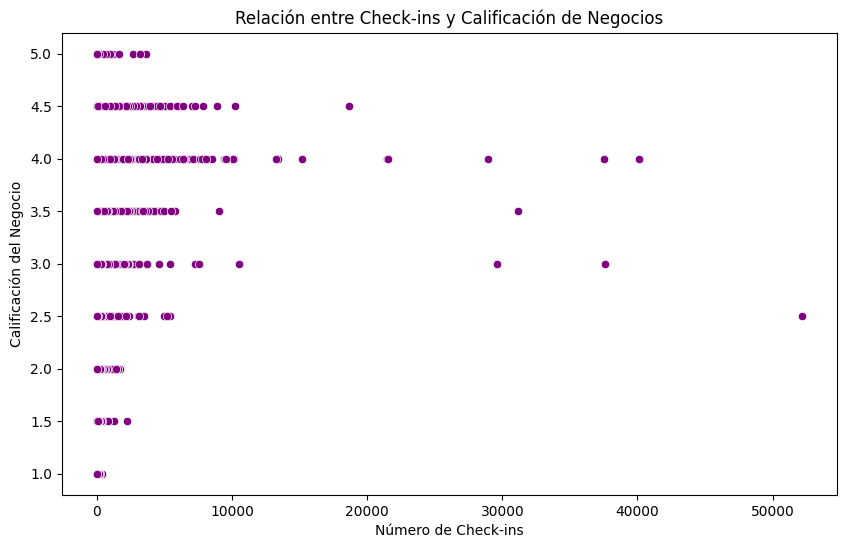

In [33]:

df_business = df_business.drop_duplicates(subset=['business_id'])

# Fusionar los datos de check-ins con las calificaciones de los negocios
df_checkins_with_stars = pd.merge(checkins_per_business, df_business[['business_id', 'stars']], on='business_id')

# Visualizar la relación entre el número de check-ins y la calificación de los negocios
plt.figure(figsize=(10, 6))
sns.scatterplot(x='checkin_count', y='stars', data=df_checkins_with_stars, color='purple')
plt.title('Relación entre Check-ins y Calificación de Negocios')
plt.xlabel('Número de Check-ins')
plt.ylabel('Calificación del Negocio')
plt.show()


El gráfico muestra la distribución de los negocios en función de su número de check-ins y su calificación. Se observa que:
 * No hay una correlación fuerte: No parece haber una correlación lineal clara entre el número de check-ins y la calificación de los negocios. Hay negocios con un alto número de check-ins que tienen calificaciones bajas, y viceversa.
 * Mayor concentración en calificaciones altas: La mayoría de los negocios tienen calificaciones relativamente altas (por encima de 3.0).
 * Distribución dispersa: Los puntos están bastante dispersos en el gráfico, lo que indica que la relación entre las dos variables no es muy fuerte.
 Otros factores influyen: La calificación de un negocio puede estar influenciada por otros factores además del número de check-ins, como la calidad del servicio, el precio, la ubicación, etc.
 * Popularidad no siempre es igual a calidad: Un negocio puede ser popular (tener muchos check-ins) sin necesariamente tener una alta calificación.
 * Subjetividad de las calificaciones: Las calificaciones de los negocios pueden ser subjetivas y variar según las preferencias de los usuarios.

Conclusión General:
El análisis de los check-ins a lo largo de la semana y del día revela patrones interesantes que podrían reflejar las rutinas y comportamientos de los usuarios:

Distribución de Check-ins a lo largo de la Semana:

Los sábados y domingos son los días con mayor actividad, seguidos de cerca por los viernes, lo que indica que los usuarios tienden a hacer más check-ins durante el fin de semana. Por otro lado, los días de semana (lunes a jueves) muestran una menor actividad, lo que podría estar relacionado con la rutina laboral o escolar.

Patrón Bimodal en el Día:

La distribución de check-ins a lo largo del día muestra un patrón bimodal con dos picos de actividad: uno temprano por la mañana (alrededor de las 0 horas) y otro por la tarde/noche (alrededor de las 16-17 horas). Este patrón podría reflejar las rutinas diarias de las personas, como actividades tempranas (trabajo, ejercicio) y actividades sociales (cenas, salidas nocturnas).

Se observa una baja actividad en la madrugada (aproximadamente entre las 2 y 10 horas), lo cual es natural dado que las personas suelen descansar en ese período.

Aumento gradual por la tarde: Después de la baja actividad de la madrugada, los check-ins aumentan de manera gradual a medida que avanza el día, alcanzando su punto máximo en la tarde/noche.

No Correlación Fuerte entre Check-ins y Calificaciones:

No hay una correlación clara entre el número de check-ins y las calificaciones de los negocios, ya que algunos negocios con muchos check-ins tienen calificaciones bajas, y otros con pocos check-ins tienen calificaciones altas. Esto sugiere que la popularidad no siempre refleja la calidad del negocio.

La mayoría de los negocios tienen calificaciones relativamente altas (por encima de 3.0), lo que podría indicar que los negocios bien valorados tienden a atraer a más usuarios, aunque no siempre de manera proporcional.

La dispersión de los puntos en el gráfico indica que otros factores además del número de check-ins pueden influir en las calificaciones, como la calidad del servicio, la ubicación o el precio, lo que resalta la subjetividad de las calificaciones de los usuarios.

EDA TIPS

Las colunnas son:user_id, business_id, text, date , compliment_count

In [34]:


# Cargar el archivo JSON en un DataFrame de pandas

df_tips = pd.read_json(r"C:\Users\yanin\OneDrive\Desktop\proyecto final\archivos\yelp\tip.json", lines=True)


In [35]:
# Ver las primeras filas del archivo para una rápida inspección
print(df_tips.head())


                  user_id             business_id  \
0  AGNUgVwnZUey3gcPCJ76iw  3uLgwr0qeCNMjKenHJwPGQ   
1  NBN4MgHP9D3cw--SnauTkA  QoezRbYQncpRqyrLH6Iqjg   
2  -copOvldyKh1qr-vzkDEvw  MYoRNLb5chwjQe3c_k37Gg   
3  FjMQVZjSqY8syIO-53KFKw  hV-bABTK-glh5wj31ps_Jw   
4  ld0AperBXk1h6UbqmM80zw  _uN0OudeJ3Zl_tf6nxg5ww   

                                                text                date  \
0                     Avengers time with the ladies. 2012-05-18 02:17:21   
1  They have lots of good deserts and tasty cuban... 2013-02-05 18:35:10   
2             It's open even when you think it isn't 2013-08-18 00:56:08   
3                          Very decent fried chicken 2017-06-27 23:05:38   
4             Appetizers.. platter special for lunch 2012-10-06 19:43:09   

   compliment_count  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [36]:
# Verificar valores nulos en cada columna
df_tips.isnull().sum()


user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

In [37]:
# Verificar si hay filas duplicadas
df_tips.duplicated().sum()


np.int64(67)

In [38]:
# Verificar el tipo de datos de cada columna
df_tips.dtypes


user_id                     object
business_id                 object
text                        object
date                datetime64[ns]
compliment_count             int64
dtype: object

convertir los datoas en string

In [39]:
# Convertir las columnas 'user_id', 'business_id', y 'text' a tipo string
df_tips['user_id'] = df_tips['user_id'].astype('string')
df_tips['business_id'] = df_tips['business_id'].astype('string')
df_tips['text'] = df_tips['text'].astype('string')

# Verificar los tipos de datos después de la conversión
print(df_tips.dtypes)


user_id             string[python]
business_id         string[python]
text                string[python]
date                datetime64[ns]
compliment_count             int64
dtype: object


In [40]:
# Consejos más populares (según los cumplidos)
top_tips = df_tips.sort_values('compliment_count', ascending=False).head(10)
print(top_tips[['text', 'compliment_count']])

# Consejos más recientes
recent_tips = df_tips.sort_values('date', ascending=False).head(10)
print(recent_tips[['text', 'date']])


                                                     text  compliment_count
543367  Experience Bern's by sitting at the bar too . ...                 6
711663            Brandon. Come here for your bbq.  Gush.                 6
85848      $8 drink menu, Velvet seats, and Dog friendly.                 5
244605  30 minute wait for our drink order is unaccept...                 5
545163  Sumo oranges are in season. (Jan.- Mar.) They ...                 5
176024  Found my next car here through Car Gurus! Grea...                 4
25307   One of the theaters refusing to show "Straight...                 4
267196  carts cost $1 here now!  Last time I visited, ...                 4
107070  Look at the stars people! I'd rather have a ro...                 4
203239  So sad. Hattie's has closed:(. Best wishes to ...                 4
                                                     text                date
538797  Donation drop off hours (non-clothing items - ... 2022-01-19 20:38:55
741844  

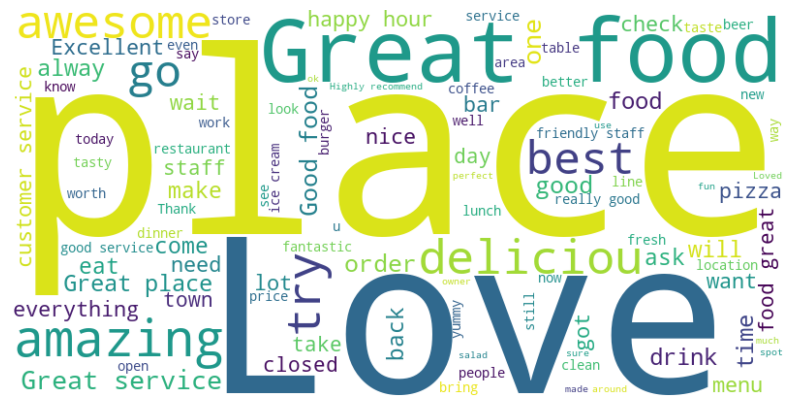

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Concatenar todos los consejos en un solo texto
text = ' '.join(df_tips['text'].dropna())

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Desactivar los ejes
plt.show()


El gráfico muestra las siguientes palabras destacadas:
 * "place" (lugar): Esta palabra es una de las más grandes y destacadas, lo que indica que se menciona con frecuencia en las reseñas.
 * "food" (comida): Otra palabra grande y destacada, lo que sugiere que la comida es un tema importante en las reseñas.
 * "great" (genial): Esta palabra también es grande y destacada, lo que indica que muchos usuarios tienen una opinión positiva sobre el lugar.
 * "service" (servicio): Esta palabra también es grande y destacada, lo que sugiere que el servicio es un aspecto importante para los usuarios.
 * "love" (amo): Esta palabra también es grande y destacada, lo que indica que muchos usuarios expresan su amor por el lugar.
Otras palabras relevantes:
 * "delicious" (delicioso)
 * "amazing" (increíble)
 * "best" (mejor)
 * "try" (probar)
 * "happy hour"
 * "open" (abierto)
 * "closed" (cerrado)
Posibles Interpretaciones:
 * Experiencia positiva: La presencia de palabras como "great", "delicious", "amazing" y "love" sugiere que muchos usuarios tienen una experiencia positiva en el lugar.
 * Importancia de la comida y el servicio: Las palabras "food" y "service" destacan la importancia de estos aspectos para los usuarios.
 * Menciones de horarios: Las palabras "open" y "closed" indican que los usuarios mencionan los horarios del lugar.
 * Recomendaciones: La palabra "try" sugiere que los usuarios recomiendan probar el lugar.
Conclusión:
El gráfico de nube de palabras proporciona una visión general de los temas y sentimientos más comunes expresados por los usuarios en sus reseñas. La presencia de palabras positivas y la importancia de la comida y el servicio sugieren que el lugar tiene una buena reputación entre los usuarios. Sin embargo, se necesitaría un análisis más profundo del texto para obtener una comprensión más completa de las opiniones de los usuarios.

fusionamos archivos para analizar la informacion

In [42]:

df_business = pd.read_pickle(r"C:\Users\yanin\OneDrive\Desktop\proyecto final\archivos\yelp\business_modificado.pkl")
# Fusionar los datos de consejos con los negocios para obtener más información
df_tips_with_business = pd.merge(df_tips, df_business[['business_id', 'name']], on='business_id')
print(df_tips_with_business[['text', 'name']].head())


                                                text  \
0                     Avengers time with the ladies.   
1  They have lots of good deserts and tasty cuban...   
2             It's open even when you think it isn't   
3                          Very decent fried chicken   
4             Appetizers.. platter special for lunch   

                          name  
0     Century 20 El Con and XD  
1    La Segunda Central Bakery  
2  Sean Thorntons Public House  
3           Wok Out Restaurant  
4                 Siam Cuisine  


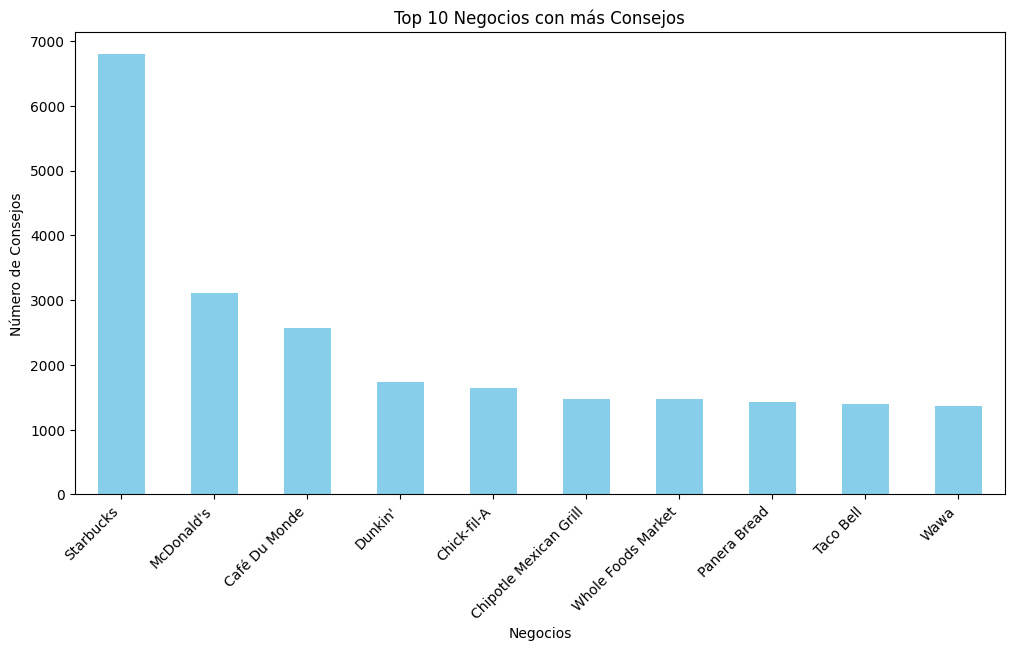

In [43]:

# Contar el número de consejos por cada negocio
tip_counts = df_tips_with_business['name'].value_counts().head(10)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
tip_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Negocios con más Consejos')
plt.xlabel('Negocios')
plt.ylabel('Número de Consejos')
plt.xticks(rotation=45, ha='right')
plt.show()


 * Popularidad de Starbucks: Starbucks es el negocio con el mayor número de check-ins, superando significativamente a todos los demás negocios en el gráfico. Esto indica que Starbucks es el negocio más popular o frecuentado de la lista.
 * McDonald's en Segundo Lugar: McDonald's ocupa el segundo lugar en términos de número de check-ins, aunque con una diferencia considerable en comparación con Starbucks.
 * Popularidad Relativa: Los demás negocios en el gráfico (Cafe Du Monde, Dunkin, Chick-fil-A, Chipotle Mexican Grill, Whole Foods Market, Panera Bread y Taco Bell) tienen un número de check-ins relativamente similar, aunque menor en comparación con Starbucks y McDonald's.

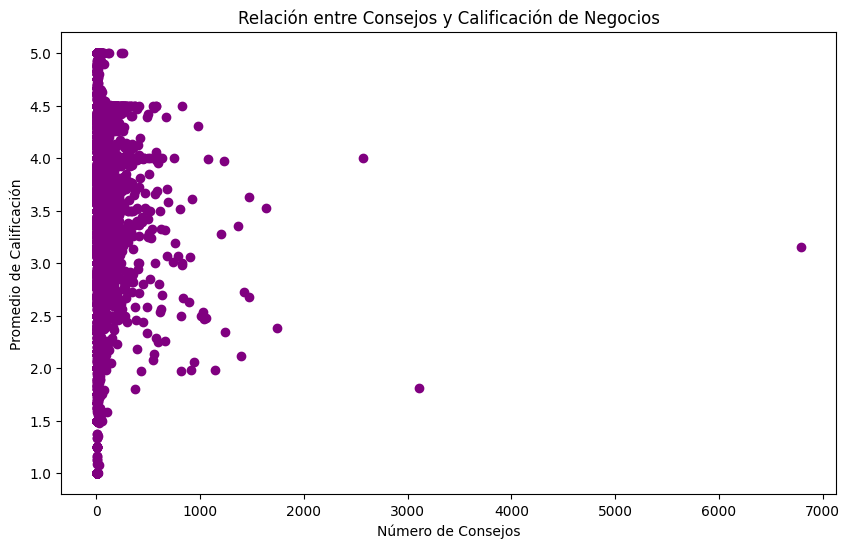

In [44]:
# Asegúrate de tener la columna 'stars' en df_business
df_tips_with_stars = pd.merge(df_tips_with_business, df_business[['business_id', 'stars']], on='business_id')

# Crear un gráfico de dispersión entre el número de consejos y la calificación
tip_counts_per_business = df_tips_with_stars.groupby('name')['text'].count()
plt.figure(figsize=(10, 6))
plt.scatter(tip_counts_per_business, df_tips_with_stars.groupby('name')['stars'].mean(), color='purple')
plt.title('Relación entre Consejos y Calificación de Negocios')
plt.xlabel('Número de Consejos')
plt.ylabel('Promedio de Calificación')
plt.show()


* No hay una correlación fuerte: No parece haber una correlación lineal clara entre el número de consejos y la calificación promedio de los negocios. Hay negocios con un alto número de consejos que tienen calificaciones bajas, y viceversa.
 * Mayor concentración en calificaciones altas: La mayoría de los negocios tienen calificaciones relativamente altas (por encima de 3.0).
 * Distribución dispersa: Los puntos están bastante dispersos en el gráfico, lo que indica que la relación entre las dos variables no es muy fuerte.
 * Mayor concentración en el origen: Hay una gran concentración de puntos en el origen del gráfico (cerca de 0 consejos y calificaciones bajas). Esto sugiere que hay muchos negocios con pocos consejos y calificaciones bajas.
 * Posibles valores atípicos: Algunos puntos en el gráfico pueden ser valores atípicos que afectan la interpretación general de la relación.

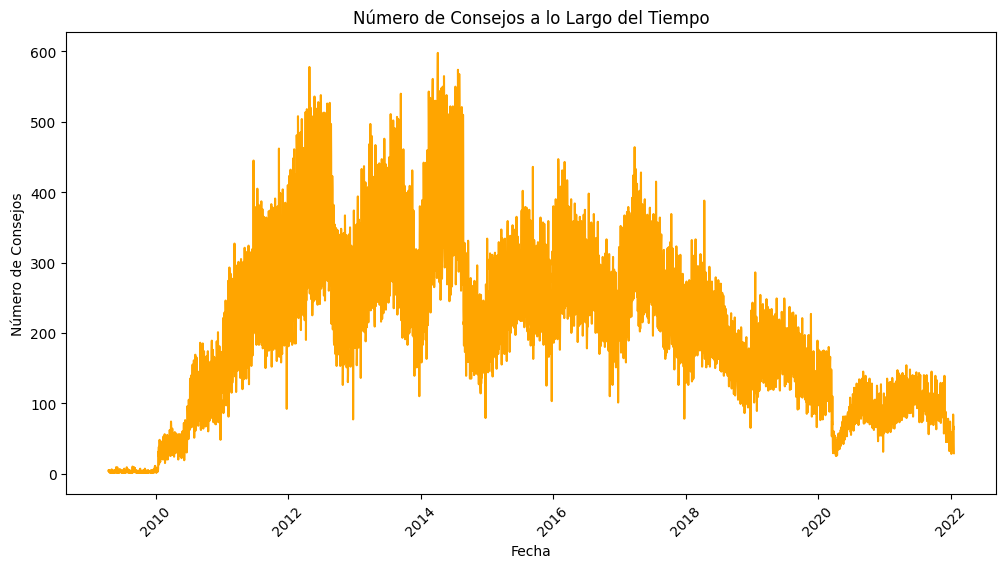

In [45]:
# Asegúrate de que la columna 'date' sea de tipo datetime
df_tips_with_business['date'] = pd.to_datetime(df_tips_with_business['date'])

# Contar consejos por fecha
tips_per_date = df_tips_with_business.groupby(df_tips_with_business['date'].dt.date).size()

# Crear un gráfico de línea
plt.figure(figsize=(12, 6))
tips_per_date.plot(kind='line', color='orange')
plt.title('Número de Consejos a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Consejos')
plt.xticks(rotation=45)
plt.show()


El gráfico muestra la siguiente tendencia general:
 * Bajo número inicial: En los primeros años (alrededor de 2010), el número de consejos es muy bajo, casi cercano a cero.
 * Aumento gradual: A partir de 2011-2012, se observa un aumento gradual en el número de consejos.
 * Picos y valles: La línea muestra varios picos y valles, lo que indica fluctuaciones en el número de consejos a lo largo del tiempo.
 * Tendencia general al alza: A pesar de las fluctuaciones, la tendencia general es al alza, lo que indica un aumento en el número de consejos a lo largo del tiempo.
 * Ligera disminución reciente: En los últimos años (alrededor de 2019-2020), se observa una ligera disminución en el número de consejos.

CONCLUSION :
Tendencia general del número de consejos:

Bajo número inicial: En los primeros años, cerca de 2010, el número de consejos es extremadamente bajo, lo que puede indicar una adopción temprana del sistema de reseñas pero con pocos usuarios participando.

Aumento gradual: A partir de 2011-2012, se observa un aumento sostenido en el número de consejos, lo que sugiere una creciente popularidad y participación de los usuarios en la plataforma.

Picos y valles: La fluctuación en los picos y valles refleja la variabilidad en el comportamiento de los usuarios a lo largo del tiempo, posiblemente influenciada por eventos o campañas específicas.

Tendencia general al alza: Aunque hay fluctuaciones, la tendencia a largo plazo es positiva, lo que indica una aceptación creciente de la plataforma de reseñas.

Ligera disminución reciente: En los años más recientes (alrededor de 2019-2020), se observa una ligera disminución, lo que podría estar relacionado con cambios en el comportamiento del usuario o la saturación del mercado de reseñas.

Relación entre consejos y calificaciones:

No correlación fuerte: No parece existir una correlación clara entre el número de consejos y la calificación promedio de los negocios. Esto sugiere que los negocios con muchos consejos no necesariamente tienen las mejores calificaciones, y viceversa.

Mayor concentración en calificaciones altas: Aunque hay negocios con muchos consejos y calificaciones bajas, la mayoría de los negocios tienden a tener calificaciones altas (por encima de 3.0).

Distribución dispersa: La relación entre los consejos y las calificaciones es bastante dispersa, lo que indica que otros factores, como la calidad del servicio o la popularidad, pueden influir más en las calificaciones que en la cantidad de reseñas.

Mayor concentración en el origen: Hay una notable concentración de negocios con pocos consejos y calificaciones bajas en el origen del gráfico, sugiriendo que muchos negocios pueden tener poco feedback de los usuarios.

Popularidad de los negocios:

Starbucks y McDonald's: Starbucks es el negocio más popular con la mayor cantidad de consejos, seguido de McDonald's, lo que refleja su atractivo masivo. Los negocios como Cafe Du Monde, Dunkin, Chick-fil-A, y otros tienen menos consejos, pero siguen siendo populares en general.

Patrón de popularidad: Los negocios con mayor número de check-ins tienden a ser cadenas grandes con un fuerte reconocimiento de marca.

Análisis de la nube de palabras en las reseñas:

Palabras positivas predominantes: Las palabras "great", "food", "service" y "love" destacan en la nube de palabras, lo que indica que los usuarios suelen asociar estas características con una experiencia positiva en los negocios.

Enfoque en la comida y el servicio: La relevancia de términos como "delicious", "amazing", y "try" resalta la importancia de la calidad de la comida y el servicio en las experiencias de los clientes.

Menciones de horarios: Las palabras "open" y "closed" sugieren que los usuarios también mencionan las horas de funcionamiento de los negocios.

Recomendaciones: La palabra "try" indica que los usuarios a menudo recomiendan probar los lugares, lo que puede ser un factor clave para atraer nuevos clientes.

edad de "review.json"

las columna:
review_id ,user_id, business_id, stars , useful, funny, cool, text, date.


In [46]:
chunks = pd.read_json(r"C:\Users\yanin\OneDrive\Desktop\proyecto final\archivos\yelp\review.json", lines=True, chunksize=chunk_size)
for chunk in chunks:
    print(f"Procesando {len(chunk)} filas.")
    print(chunk.head())


Procesando 100000 filas.
                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   
2      3       0      0     0   
3      5       1      0     1   
4      4       1      0     1   

                                                text                date  
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
3  Wow!  Yumm

In [47]:
# Contar valores nulos por columna
null_counts =chunk .isnull().sum()
print("Valores nulos por columna:")
print(null_counts)


Valores nulos por columna:
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64


In [48]:
# Contar filas duplicadas
duplicate_counts = chunk.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicate_counts}")


Cantidad de filas duplicadas: 0


In [49]:
# Ver tipos de datos de las columnas
print("Tipos de datos por columna:")
print(chunk.dtypes)


Tipos de datos por columna:
review_id              object
user_id                object
business_id            object
stars                   int64
useful                  int64
funny                   int64
cool                    int64
text                   object
date           datetime64[ns]
dtype: object


In [50]:

# 1. Estadísticas descriptivas para columnas numéricas
desc_stats = chunk[['stars', 'useful', 'funny', 'cool']].describe()

print("Estadísticas descriptivas:")
print(desc_stats)

# 2. Distribución de frecuencias de las estrellas
star_counts = chunk['stars'].value_counts()

print("\nDistribución de frecuencias de las estrellas:")
print(star_counts)

# 3. Ver correlación entre los votos útiles, graciosos y cool
correlation = chunk[['useful', 'funny', 'cool']].corr()

print("\nCorrelación entre votos útiles, graciosos y cool:")
print(correlation)


Estadísticas descriptivas:
              stars        useful         funny          cool
count  90280.000000  90280.000000  90280.000000  90280.000000
mean       3.610933      1.769373      0.482632      0.826595
std        1.622845      4.785276      2.427570      3.464703
min        1.000000      0.000000      0.000000      0.000000
25%        2.000000      0.000000      0.000000      0.000000
50%        4.000000      1.000000      0.000000      0.000000
75%        5.000000      2.000000      0.000000      1.000000
max        5.000000    392.000000    288.000000    304.000000

Distribución de frecuencias de las estrellas:
stars
5    43323
1    19427
4    13910
3     7073
2     6547
Name: count, dtype: int64

Correlación entre votos útiles, graciosos y cool:
          useful     funny      cool
useful  1.000000  0.653141  0.792367
funny   0.653141  1.000000  0.763812
cool    0.792367  0.763812  1.000000


1. Estadísticas descriptivas:
 * Se proporcionan estadísticas descriptivas para las columnas 'stars', 'useful', 'funny' y 'cool'.
 * count: El número total de observaciones (reseñas) es de 90280.
 * mean: El promedio de estrellas es de 3.61, lo que indica que, en promedio, las reseñas tienen una calificación relativamente alta. El promedio de votos útiles es de 1.77, el de votos graciosos es de 0.48 y el de votos cool es de 0.83.
 * std: La desviación estándar mide la dispersión de los datos. La desviación estándar de las estrellas es de 1.62, lo que indica que hay cierta variabilidad en las calificaciones. La desviación estándar de los votos útiles, graciosos y cool es relativamente alta, lo que indica que hay una gran variabilidad en el número de votos de cada tipo.
 * min: El valor mínimo para todas las variables es 0, excepto para las estrellas, que es 1.
 * 25%, 50%, 75%: Estos son los percentiles, que indican el valor por debajo del cual cae un cierto porcentaje de los datos. Por ejemplo, el 50% de las reseñas tienen 4 o menos estrellas, el 50% de las reseñas tienen 1 o menos votos útiles, 0 votos graciosos y 0 votos cool.
 * max: El valor máximo de estrellas es 5. Los valores máximos para votos útiles, graciosos y cool son 392, 288 y 304, respectivamente, lo que indica que hay algunas reseñas con un número excepcionalmente alto de votos.
 2. Distribución de frecuencias de las estrellas:
 * Se muestra la distribución de frecuencias de las estrellas.
 * La mayoría de las reseñas tienen 5 estrellas (43323).
 * Un número significativo de reseñas tienen 1 estrella (19427).
 * No se muestran las frecuencias de 2, 3 y 4 estrellas, pero se puede inferir que son menores que las de 1 y 5 estrellas.

In [51]:


# Filtrar las columnas relevantes (por ejemplo, 'stars', 'useful', 'funny', 'cool')
df_reviews_filtered = chunk[['stars', 'useful', 'funny', 'cool']]

# Método 1: Usar el rango intercuartílico (IQR) para detectar valores atípicos
Q1 = df_reviews_filtered.quantile(0.25)
Q3 = df_reviews_filtered.quantile(0.75)
IQR = Q3 - Q1

# Definir límites de los valores no atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detectar los valores atípicos
outliers_iqr = df_reviews_filtered[(df_reviews_filtered < lower_bound) | (df_reviews_filtered > upper_bound)]

# Mostrar los valores atípicos
print("Valores atípicos detectados con IQR:")
print(outliers_iqr.dropna())

# Método 2: Usar desviación estándar
mean = df_reviews_filtered.mean()
std_dev = df_reviews_filtered.std()

# Valores atípicos fuera de 3 desviaciones estándar
outliers_std = df_reviews_filtered[(df_reviews_filtered < (mean - 3 * std_dev)) | (df_reviews_filtered > (mean + 3 * std_dev))]

# Mostrar los valores atípicos
print("Valores atípicos detectados con desviación estándar:")
print(outliers_std.dropna())


Valores atípicos detectados con IQR:
Empty DataFrame
Columns: [stars, useful, funny, cool]
Index: []
Valores atípicos detectados con desviación estándar:
Empty DataFrame
Columns: [stars, useful, funny, cool]
Index: []


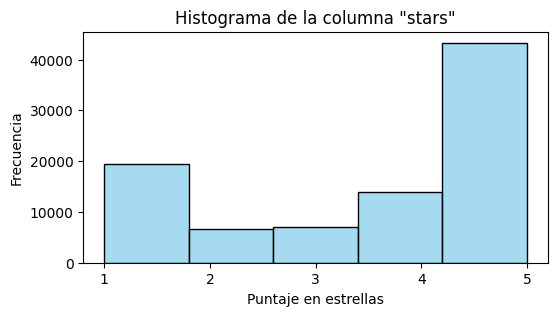

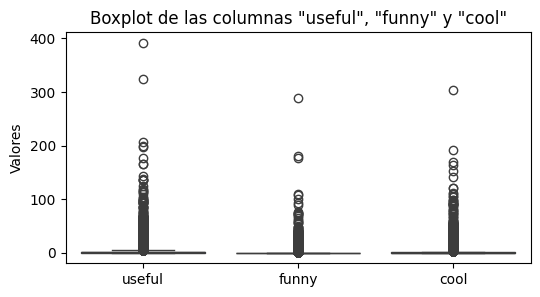

In [52]:


# Histograma de la columna 'stars'
plt.figure(figsize=(6, 3))
sns.histplot(df_reviews_filtered['stars'], bins=5, kde=False, color='skyblue', edgecolor='black')
plt.title('Histograma de la columna "stars"')
plt.xlabel('Puntaje en estrellas')
plt.ylabel('Frecuencia')
plt.xticks([1, 2, 3, 4, 5])  # Asegurar que se muestren los valores de estrellas 1 a 5
plt.show()

# Boxplot para las columnas 'useful', 'funny' y 'cool'
plt.figure(figsize=(6, 3))
sns.boxplot(data=df_reviews_filtered[['useful', 'funny', 'cool']])
plt.title('Boxplot de las columnas "useful", "funny" y "cool"')
plt.ylabel('Valores')
plt.show()


* El histograma muestra que la distribución de las estrellas no es uniforme. Hay una alta frecuencia de puntajes de 5 estrellas, lo que sugiere que la mayoría de las reseñas tienen calificaciones altas.
 * La frecuencia de 1 estrella también es relativamente alta, lo que indica que también hay un número significativo de reseñas con calificaciones bajas.
 * Las frecuencias de 2, 3 y 4 estrellas son mucho más bajas, lo que indica que hay menos reseñas con calificaciones intermedias.
 * La distribución parece estar sesgada hacia la derecha, con una cola larga hacia la izquierda

cada boxplot muestra la distribución de una variable. El boxplot muestra la mediana, los cuartiles, los valores atípicos y el rango de la variable.
Análisis:
 * Los boxplots muestran que las tres variables tienen una distribución asimétrica, con una cola larga hacia la derecha.
 * Hay valores atípicos en las tres variables, lo que indica que hay algunas reseñas que tienen muchos votos útiles, graciosos o geniales.
 * La mediana de "funny" es la más baja, lo que sugiere que la mayoría de las reseñas no se consideran graciosas.
 * La mediana de "useful" es ligeramente más alta que la de "cool", lo que sugiere que las reseñas tienden a ser consideradas más útiles que geniales.
 * La dispersión de los datos (el rango intercuartílico) es mayor para "useful" y "cool" que para "funny", lo que indica que hay más variabilidad en el número de votos útiles y geniales que en el número de votos graciosos.
Posibles conclusiones e implicaciones:
 * Los votos útiles y geniales tienden a ser más comunes que los votos graciosos.
 * Hay algunas reseñas que son excepcionalmente útiles, graciosas o geniales.

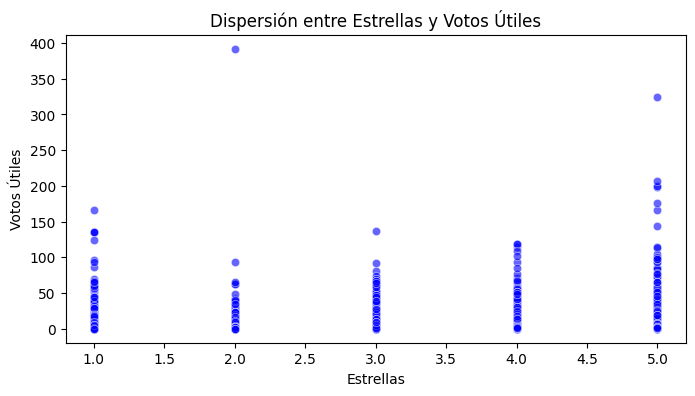

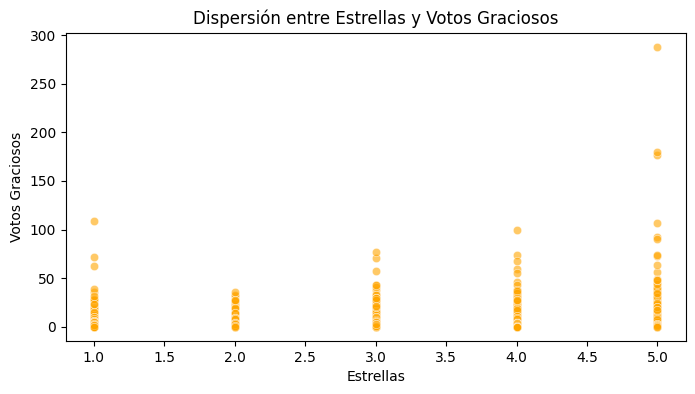

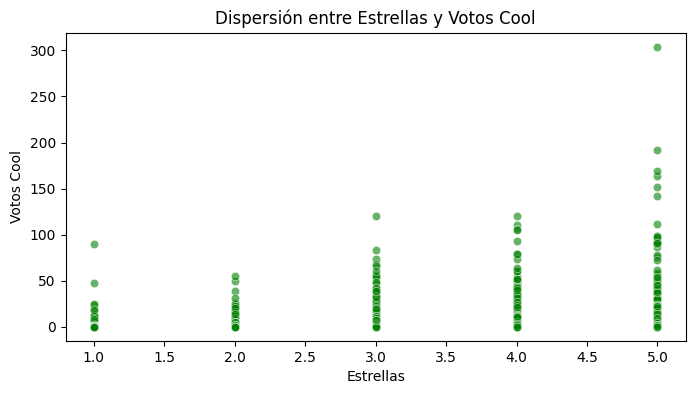

           stars    useful     funny      cool
stars   1.000000 -0.043639 -0.009626  0.093218
useful -0.043639  1.000000  0.653141  0.792367
funny  -0.009626  0.653141  1.000000  0.763812
cool    0.093218  0.792367  0.763812  1.000000


In [53]:
# Gráfico de dispersión entre 'stars' y 'useful'
plt.figure(figsize=(8, 4))
sns.scatterplot(x='stars', y='useful', data=df_reviews_filtered, color='blue', alpha=0.6)
plt.title('Dispersión entre Estrellas y Votos Útiles')
plt.xlabel('Estrellas')
plt.ylabel('Votos Útiles')
plt.show()

# Gráfico de dispersión entre 'stars' y 'funny'
plt.figure(figsize=(8, 4))
sns.scatterplot(x='stars', y='funny', data=df_reviews_filtered, color='orange', alpha=0.6)
plt.title('Dispersión entre Estrellas y Votos Graciosos')
plt.xlabel('Estrellas')
plt.ylabel('Votos Graciosos')
plt.show()

# Gráfico de dispersión entre 'stars' y 'cool'
plt.figure(figsize=(8, 4))
sns.scatterplot(x='stars', y='cool', data=df_reviews_filtered, color='green', alpha=0.6)
plt.title('Dispersión entre Estrellas y Votos Cool')
plt.xlabel('Estrellas')
plt.ylabel('Votos Cool')
plt.show()

# Correlación entre 'stars' y los votos
correlation = df_reviews_filtered[['stars', 'useful', 'funny', 'cool']].corr()
print(correlation)


El gráfico de dispersión muestra la relación entre "Estrellas" y "Votos Útiles". Se observa una tendencia positiva, lo que significa que a medida que aumenta el número de estrellas, también tiende a aumentar el número de votos útiles.
 * Dispersión: Hay una gran dispersión en los datos, lo que significa que hay muchas observaciones que no siguen la tendencia general. Sin embargo, la tendencia positiva es aún evidente.
 * Valores atípicos: Se pueden observar algunos valores atípicos, como el punto con un valor de "Votos Útiles" alto para un valor de "Estrellas" bajo (2.0) y los puntos con valores de "Votos Útiles" altos para valores de "Estrellas" altos (5.0).

* El gráfico muestra la dispersión de los datos, lo que permite visualizar si existe alguna relación entre las dos variables.
 * A diferencia del gráfico anterior que mostraba la relación entre estrellas y votos "cool", este gráfico muestra una relación menos clara entre estrellas y votos graciosos.
 * No parece haber una tendencia fuerte entre las dos variables. Hay una gran dispersión en los datos, lo que significa que no hay una relación evidente entre el número de estrellas y el número de votos graciosos.
 * Se pueden observar grupos de puntos en ciertos rangos de estrellas, pero estos grupos no muestran una tendencia clara.
 * Para valores de estrellas bajos (1.0 y 2.0), los votos graciosos tienden a ser bajos.
 * Para valores de estrellas más altos (3.0 y 4.0), se observa una mayor variedad en los votos graciosos, pero no hay una tendencia clara hacia valores más altos.
 * Hay un punto atípico con un valor de votos graciosos alto para un valor de estrellas bajo (1.0).

* El gráfico muestra la dispersión de los datos, lo que permite visualizar si existe alguna relación entre las dos variables.
 * En general, parece haber una tendencia positiva entre "Estrellas" y "Votos Cool". A medida que aumenta el número de estrellas, también tiende a aumentar el número de votos cool.
 * Sin embargo, la relación no es perfecta. Hay una gran dispersión en los datos, lo que significa que hay muchas observaciones que no siguen la tendencia general.
 * Se pueden observar grupos de puntos en ciertos rangos de estrellas, lo que sugiere que hay categorías o subgrupos dentro de los datos.
 * Para valores de estrellas bajos (1.0 y 2.0), los votos cool tienden a ser bajos.
 * Para valores de estrellas más altos (3.0 y 4.0), se observa una mayor variedad en los votos cool, con algunos valores altos.
 * No hay puntos con valores de estrellas superiores a 4.5.

In [54]:
# Contar el número de reseñas por usuario
reviews_per_user = chunk.groupby('user_id').size()

# Mostrar los 10 usuarios más activos
top_users = reviews_per_user.sort_values(ascending=False).head(10)
print(top_users)

# Promedio de estrellas por usuario
avg_stars_per_user = chunk.groupby('user_id')['stars'].mean()
top_users_avg_stars = avg_stars_per_user.sort_values(ascending=False).head(10)
print(top_users_avg_stars)


user_id
ET8n-r7glWYqZhuR6GcdNw    114
bJ5FtCtZX3ZZacz2_2PJjA    102
pou3BbKsIozfH50rxmnMew     83
WwulXySQN8t2hwqH_yWurA     45
5O3VvfDu_HDvgUviAqmTEA     45
-G7Zkl1wIWBBmD0KRy_sCw     41
ppsm8EDKjA1fp1yTCP3RrQ     40
6s-g2vFu12OemhiK3FJuOQ     37
NNgQ8fV5ARQgHw-Ob7l50A     35
fr1Hz2acAb3OaL3l6DyKNg     35
dtype: int64
user_id
zzcSgjfQjgB2nE-n2zCVMQ    5.0
zzUdRyz7uebYI4t5z4Snmg    5.0
--7XOV5T9yZR5w1DIy_Dog    5.0
--8MBM8RDdd-A0XVK4yxvQ    5.0
zyfQkC4UITOpJNC1mLzm_A    5.0
zyab2qsMarU5bGjhRL7syw    5.0
zyUJQ-RGG7cYnDu8AqVm_Q    5.0
zyDj0-XUYM3rEi4VWK-hKw    5.0
zy8MURJjVgDB8c9i9rzr5A    5.0
zy4O-1FsY3-2aigfhK_CYQ    5.0
Name: stars, dtype: float64


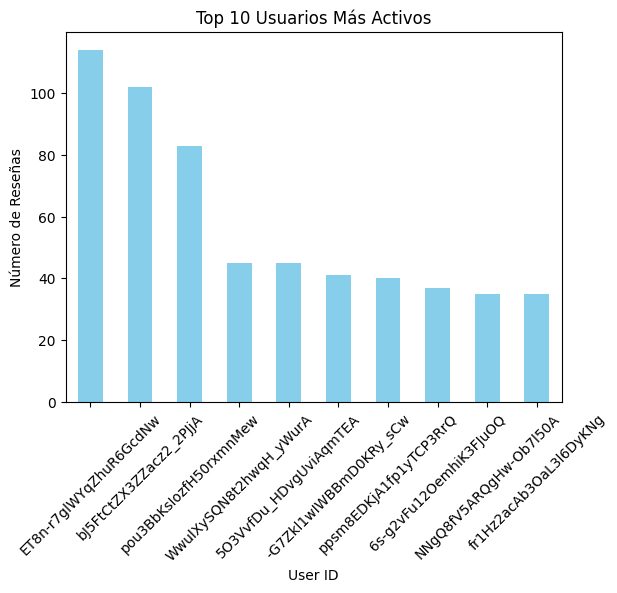

In [55]:


# Graficar los 10 usuarios más activos
top_users.plot(kind='bar', color='skyblue')
plt.title('Top 10 Usuarios Más Activos')
plt.xlabel('User ID')
plt.ylabel('Número de Reseñas')
plt.xticks(rotation=45)
plt.show()


 * El gráfico permite una comparación visual rápida de la actividad entre los diferentes usuarios. Es evidente que algunos usuarios son significativamente más activos que otros.
 * El usuario representado por la primera barra (a la izquierda) es el más activo.
 * A medida que se avanza hacia la derecha en el eje X, la altura de las barras disminuye, lo que indica una disminución en la actividad de los usuarios

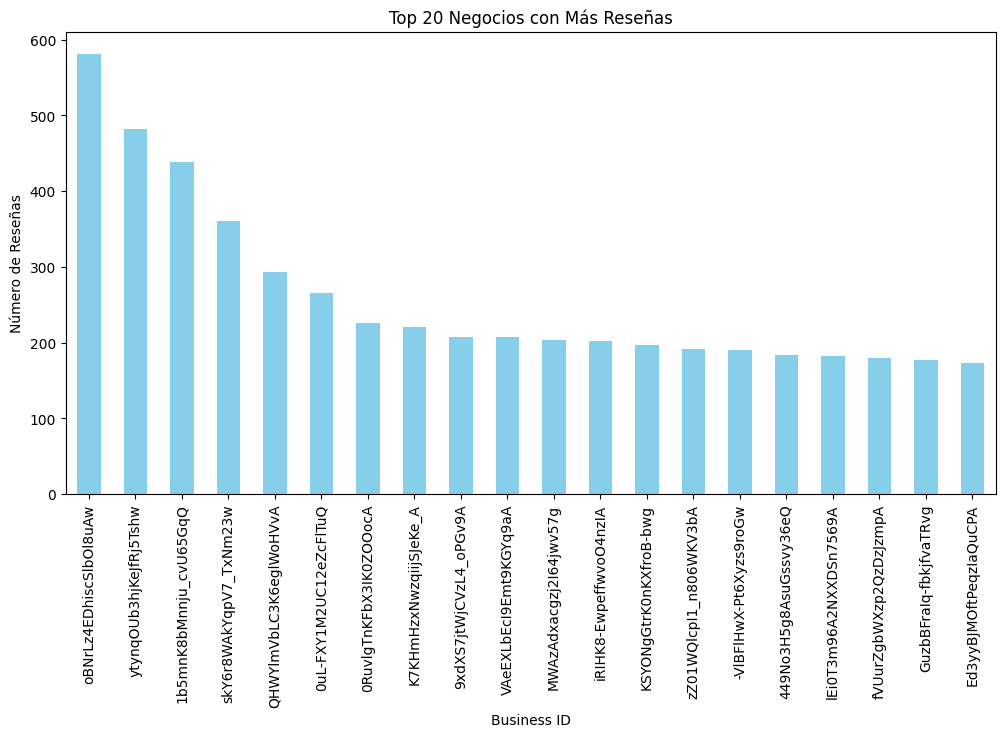

In [56]:
# Contar el número de reseñas por negocio
reviews_per_business = chunk.groupby('business_id').size()

# Graficar la distribución de reseñas por negocio
plt.figure(figsize=(12, 6))
reviews_per_business.sort_values(ascending=False).head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Negocios con Más Reseñas')
plt.xlabel('Business ID')
plt.ylabel('Número de Reseñas')
plt.xticks(rotation=90)
plt.show()



El gráfico permite una comparación visual rápida del número de reseñas entre los diferentes negocios. Es evidente que algunos negocios tienen significativamente más reseñas que otros.
 * El negocio representado por la primera barra (a la izquierda) tiene la mayor cantidad de reseñas.
 * A medida que se avanza hacia la derecha en el eje X, la altura de las barras disminuye, lo que indica una disminución en el número de reseñas.

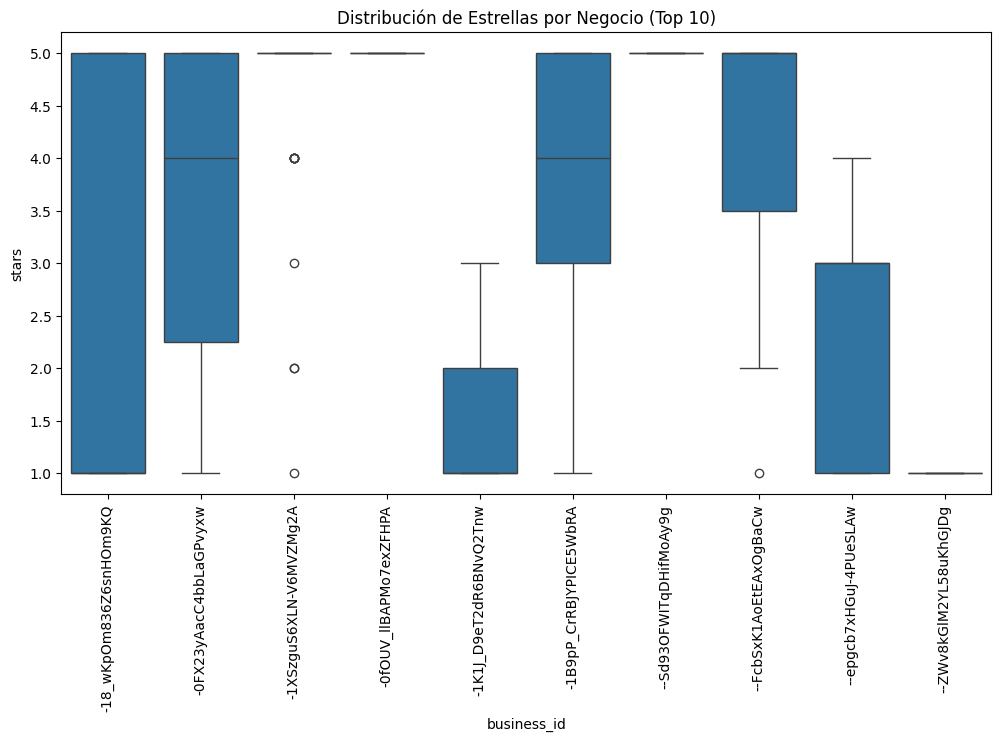

In [57]:

# Graficar la distribución de puntajes por negocio (top 10)
plt.figure(figsize=(12, 6))
sns.boxplot(x='business_id', y='stars', data=chunk[chunk['business_id'].isin(reviews_per_business.head(10).index)])
plt.title('Distribución de Estrellas por Negocio (Top 10)')
plt.xticks(rotation=90)
plt.show()

* Variabilidad en las Calificaciones: Se observa una variabilidad significativa en las calificaciones de estrellas entre los diferentes negocios. Algunos negocios tienen una distribución de calificaciones más amplia, mientras que otros tienen una distribución más estrecha.
 * Negocios con Calificaciones Altas: Algunos negocios (por ejemplo, "XLN - V6MVZMg2A") muestran una distribución de calificaciones más alta, lo que indica que tienden a recibir calificaciones más altas de manera consistente.
 * Negocios con Calificaciones Bajas: Otros negocios (por ejemplo, "T2dR6BNvQ2Tnw") muestran una distribución de calificaciones más baja, lo que indica que tienden a recibir calificaciones más bajas de manera consistente.
 * Presencia de Valores Atípicos: Algunos negocios muestran valores atípicos (puntos fuera de los bigotes de las cajas). Estos valores atípicos representan calificaciones inusualmente altas o bajas que podrían indicar experiencias excepcionales o problemas específicos.
 * Comparación de Mediana: La línea dentro de cada caja representa la mediana de las calificaciones. Comparar las medianas entre los negocios puede ayudar a identificar qué negocios tienen calificaciones promedio más altas o más bajas.

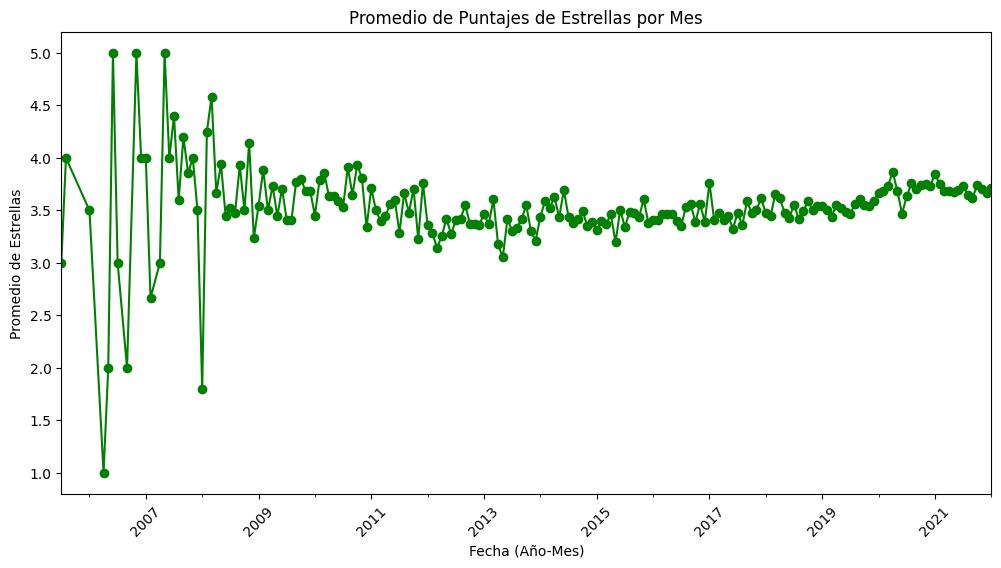

In [58]:
# Convertir la columna 'date' a formato de fecha
chunk['date'] = pd.to_datetime(chunk['date'])

# Extraer el año y el mes de la fecha
chunk['year_month'] = chunk['date'].dt.to_period('M')

# Agrupar por año y mes y calcular el promedio de 'stars'
monthly_avg_stars = chunk.groupby('year_month')['stars'].mean()

# Graficar el promedio de estrellas por mes
plt.figure(figsize=(12, 6))
monthly_avg_stars.plot(kind='line', color='green', marker='o')
plt.title('Promedio de Puntajes de Estrellas por Mes')
plt.xlabel('Fecha (Año-Mes)')
plt.ylabel('Promedio de Estrellas')
plt.xticks(rotation=45)
plt.show()


* Tendencia Decreciente: Se observa una tendencia general decreciente en el promedio de estrellas a lo largo del tiempo. Al principio, en 2007, el promedio de estrellas era relativamente alto (cercano a 4.5), pero luego disminuye gradualmente hasta estabilizarse alrededor de 3.5 en los años más recientes.
 * Volatilidad Inicial: En los primeros años (2007-2009), el gráfico muestra una alta volatilidad, con fluctuaciones significativas en el promedio de estrellas. Esto sugiere que hubo cambios bruscos en la percepción o calidad del servicio/producto durante ese período.
 * Estabilización Posterior: A partir de 2010, el promedio de estrellas se estabiliza y muestra menos fluctuaciones. Esto podría indicar que la calidad del servicio/producto se volvió más consistente o que la percepción del cliente se volvió más estable.
 * Puntos Atípicos: Se observan algunos puntos atípicos en el gráfico, especialmente en los primeros años. Estos puntos representan meses con promedios de estrellas significativamente más altos o más bajos que el promedio general.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yanin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\yanin\AppData\Local\Temp\ipykernel_19668\2637391200.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=chunk, palette='Set2')


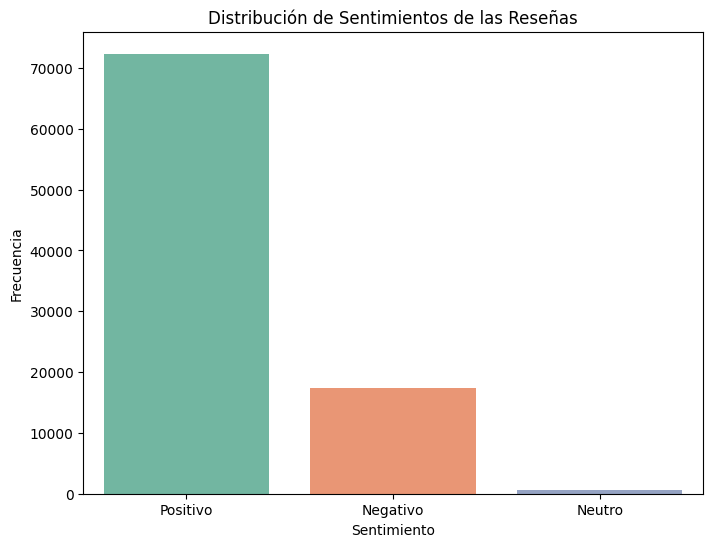

In [59]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Inicializar el analizador de sentimiento
sia = SentimentIntensityAnalyzer()

# Función para obtener el sentimiento de la reseña
def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)['compound']
    if sentiment_score > 0:
        return 'Positivo'
    elif sentiment_score < 0:
        return 'Negativo'
    else:
        return 'Neutro'

# Aplicar el análisis de sentimiento
chunk['sentiment'] = chunk['text'].apply(get_sentiment)

# Graficar la distribución de los sentimientos
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=chunk, palette='Set2')
plt.title('Distribución de Sentimientos de las Reseñas')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()


* Sentimiento Dominante: La barra azul, que representa un sentimiento específico (asumiremos que es "Positivo" ), tiene una frecuencia significativamente mayor que la otra barra. Esto indica que la mayoría de las reseñas expresan este sentimiento dominante.
 * Sentimiento Minoritario: La barra rosa, que representa otro sentimiento (asumiremos que es "Negativo"), tiene una frecuencia mucho menor. Esto sugiere que este sentimiento es menos común en las reseñas.
 * Desequilibrio en los Sentimientos: Existe un claro desequilibrio en la distribución de los sentimientos. El sentimiento dominante aparece con mucha más frecuencia que el sentimiento minoritario

              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara  <NA>       93101   
1  87 Grasso Plaza Shopping Center         Affton  <NA>       63123   
2             5255 E Broadway Blvd         Tucson  <NA>       85711   
3                      935 Race St   Philadelphia    CA       19107   
4                    101 Walnut St     Green Lane    MO       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.9555

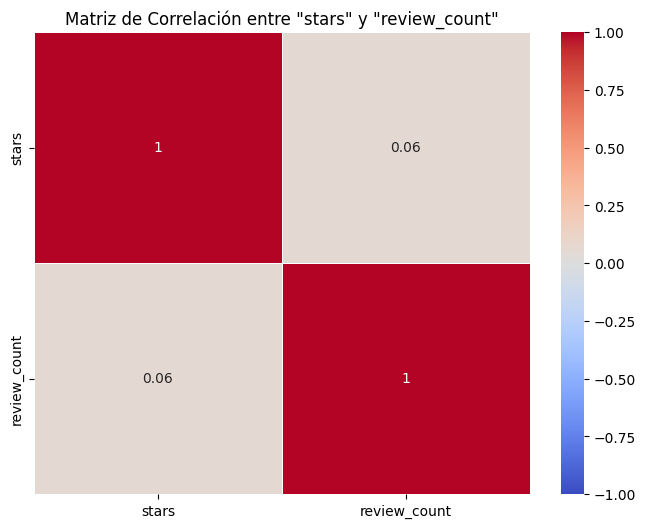

In [60]:


# Cargar el archivo JSON de negocios en un DataFrame

df_business = pd.read_pickle(r"C:\Users\yanin\OneDrive\Desktop\proyecto final\archivos\yelp\business_modificado.pkl")
# Verificar las primeras filas para asegurarse de que las columnas de interés existen
print(df_business.head())

# Filtrar columnas numéricas que puedan ser relevantes para la correlación
# Suponiendo que 'stars' y 'review_count' son de interés
df_business_filtered = df_business[['stars', 'review_count']]

# Calcular la matriz de correlación
correlation = df_business_filtered.corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation = df_business_filtered.corr()

# Graficar la matriz de correlación utilizando un mapa de calor (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Matriz de Correlación entre "stars" y "review_count"')
plt.show()



 No hay una relación lineal fuerte entre el número de estrellas que recibe un negocio y el número de reseñas que tiene. En otras palabras, tener más reseñas no necesariamente significa que un negocio tendrá más estrellas, y viceversa.
 * La correlación de 0.06 es muy cercana a cero, lo que sugiere que otras variables podrían estar influyendo en el número de estrellas y reseñas.

conclusion: el análisis de los datos de reseñas revela patrones interesantes sobre el comportamiento de los usuarios y la percepción de los productos o servicios. Desde la perspectiva estadística, observamos que las calificaciones de estrellas tienden a polarizarse, con una alta frecuencia de reseñas de 5 estrellas y 1 estrella, lo que sugiere que los usuarios suelen expresar opiniones extremas. Además, existe una correlación positiva entre los votos útiles, graciosos y cool, lo que indica que las reseñas que son consideradas útiles también tienden a ser vistas como graciosas y geniales.
Los gráficos de dispersión y los boxplots confirman la presencia de valores atípicos, lo que sugiere que hay algunas reseñas que destacan por su utilidad, humor o genialidad. La distribución asimétrica de los votos útiles, graciosos y cool indica que hay factores adicionales, además de la calificación con estrellas, que influyen en cómo los usuarios perciben y valoran las reseñas.
El histograma de las estrellas muestra una distribución sesgada hacia la derecha, lo que refuerza la idea de que la mayoría de las reseñas tienen calificaciones altas. Sin embargo, la presencia de un número significativo de reseñas de 1 estrella indica que también hay un grupo de usuarios que expresan fuertes críticas.
Finalmente, el gráfico de los 10 usuarios más activos revela que hay una gran disparidad en la actividad de los usuarios. Algunos usuarios son mucho más activos que otros, lo que sugiere que podrían tener un papel importante en la comunidad o plataforma.
Implicaciones:
 * Percepción del producto/servicio: Las calificaciones extremas sugieren que los productos o servicios generan experiencias muy positivas o muy negativas.
 * Calidad de las reseñas: La correlación entre los votos útiles, graciosos y cool indica que la calidad del contenido de la reseña es importante para los usuarios.
 * Comunidad: Los usuarios más activos podrían ser influyentes y tener un impacto significativo en la plataforma.
 * Necesidad de investigación adicional: Sería útil investigar los factores que influyen en la percepción de las reseñas y la actividad de los usuarios.
En resumen, el análisis de los datos de reseñas proporciona información valiosa sobre el comportamiento de los usuarios y la percepción de los productos o servicios. Esta información puede ser utilizada para mejorar la calidad de las reseñas, fomentar la participación de los usuarios y comprender mejor las necesidades y preferencias de los clientes.

EDA user.parquet

Columnas son:
'user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'

In [3]:
import pandas as pd

# Ruta del archivo 
file_path = r"C:\Users\yanin\OneDrive\Desktop\proyecto final\archivos\yelp\user.parquet"

# Cargar el archivo Parquet
df= pd.read_parquet(file_path)

# Mostrar las primeras filas
print(df.head())


                  user_id    name  review_count        yelping_since  useful  \
0  qVc8ODYU5SZjKXVBgXdI7w  Walker           585  2007-01-25 16:47:26    7217   
1  j14WgRoU_-2ZE1aw1dXrJg  Daniel          4333  2009-01-25 04:35:42   43091   
2  2WnXYQFK0hXEoTxPtV2zvg   Steph           665  2008-07-25 10:41:00    2086   
3  SZDeASXq7o05mMNLshsdIA    Gwen           224  2005-11-29 04:38:33     512   
4  hA5lMy-EnncsH4JoR-hFGQ   Karen            79  2007-01-05 19:40:59      29   

   funny   cool                                              elite  \
0   1259   5994                                               2007   
1  13066  27281  2009,2010,2011,2012,2013,2014,2015,2016,2017,2...   
2   1010   1003                           2009,2010,2011,2012,2013   
3    330    299                                     2009,2010,2011   
4     15      7                                                      

                                             friends  fans  ...  \
0  NSCy54eWehBJyZdG2iE84w, pe42

In [4]:
# Mostrar información general del DataFrame
print("📌 Información del DataFrame:")
print(df.info(), "\n")

📌 Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 353.4+ MB
N

In [5]:
# Contar valores nulos por columna
print("📌 Valores nulos por columna:")
print(df.isnull().sum(), "\n")

📌 Valores nulos por columna:
user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64 



In [6]:
# Contar valores duplicados
print(f"📌 Filas duplicadas: {df.duplicated().sum()} \n")

📌 Filas duplicadas: 117700 



In [7]:
# Eliminar duplicados y mantener solo la primera aparición
df_user = df.drop_duplicates()

# Verificar si aún hay duplicados
print(f"📌 Filas duplicadas después de limpiar: {df_user.duplicated().sum()}")

# Mostrar el tamaño del DataFrame antes y después
print(f"📌 Tamaño original: {df.shape[0]} filas")
print(f"📌 Tamaño después de limpiar: {df_user.shape[0]} filas")

📌 Filas duplicadas después de limpiar: 0
📌 Tamaño original: 2105597 filas
📌 Tamaño después de limpiar: 1987897 filas


In [8]:
# Mostrar tipos de datos
print("📌 Tipos de datos:")
print(df_user.dtypes)

📌 Tipos de datos:
user_id                object
name                   object
review_count            int64
yelping_since          object
useful                  int64
funny                   int64
cool                    int64
elite                  object
friends                object
fans                    int64
average_stars         float64
compliment_hot          int64
compliment_more         int64
compliment_profile      int64
compliment_cute         int64
compliment_list         int64
compliment_note         int64
compliment_plain        int64
compliment_cool         int64
compliment_funny        int64
compliment_writer       int64
compliment_photos       int64
dtype: object


In [9]:
# Resumen estadístico de las columnas numéricas
print("\nResumen estadístico de las columnas numéricas:")
print(df_user.describe())



Resumen estadístico de las columnas numéricas:
       review_count        useful         funny          cool          fans  \
count  1.987897e+06  1.987897e+06  1.987897e+06  1.987897e+06  1.987897e+06   
mean   2.339441e+01  4.229634e+01  1.697054e+01  2.379291e+01  1.465740e+00   
std    8.256699e+01  6.414806e+02  4.078034e+02  5.653513e+02  1.813075e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    5.000000e+00  3.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    1.700000e+01  1.300000e+01  2.000000e+00  3.000000e+00  0.000000e+00   
max    1.747300e+04  2.062960e+05  1.858230e+05  1.998780e+05  1.249700e+04   

       average_stars  compliment_hot  compliment_more  compliment_profile  \
count   1.987897e+06    1.987897e+06     1.987897e+06        1.987897e+06   
mean    3.630494e+00    1.807072e+00     2.922631e-01        1.793176e-01   
std     1

In [11]:
import numpy as np

# Función para detectar valores atípicos con IQR
def detectar_outliers_iqr(df_user):
    outliers = {}
    for col in df_user.select_dtypes(include=np.number):  # Solo columnas numéricas
        Q1 = df_user[col].quantile(0.25)  # Primer cuartil (25%)
        Q3 = df_user[col].quantile(0.75)  # Tercer cuartil (75%)
        IQR = Q3 - Q1  # Rango intercuartílico
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Contar outliers
        num_outliers = df_user[(df_user[col] < limite_inferior) | (df_user[col] > limite_superior)].shape[0]
        outliers[col] = num_outliers

    return outliers

# Detectar valores atípicos
outliers_detectados = detectar_outliers_iqr(df_user)

print("📌 Cantidad de valores atípicos por columna:")
print(outliers_detectados)


📌 Cantidad de valores atípicos por columna:
{'review_count': 235589, 'useful': 262744, 'funny': 313004, 'cool': 283271, 'fans': 410027, 'average_stars': 0, 'compliment_hot': 154215, 'compliment_more': 148788, 'compliment_profile': 61771, 'compliment_cute': 40767, 'compliment_list': 17194, 'compliment_note': 316878, 'compliment_plain': 345377, 'compliment_cool': 240003, 'compliment_funny': 240003, 'compliment_writer': 198986, 'compliment_photos': 124883}


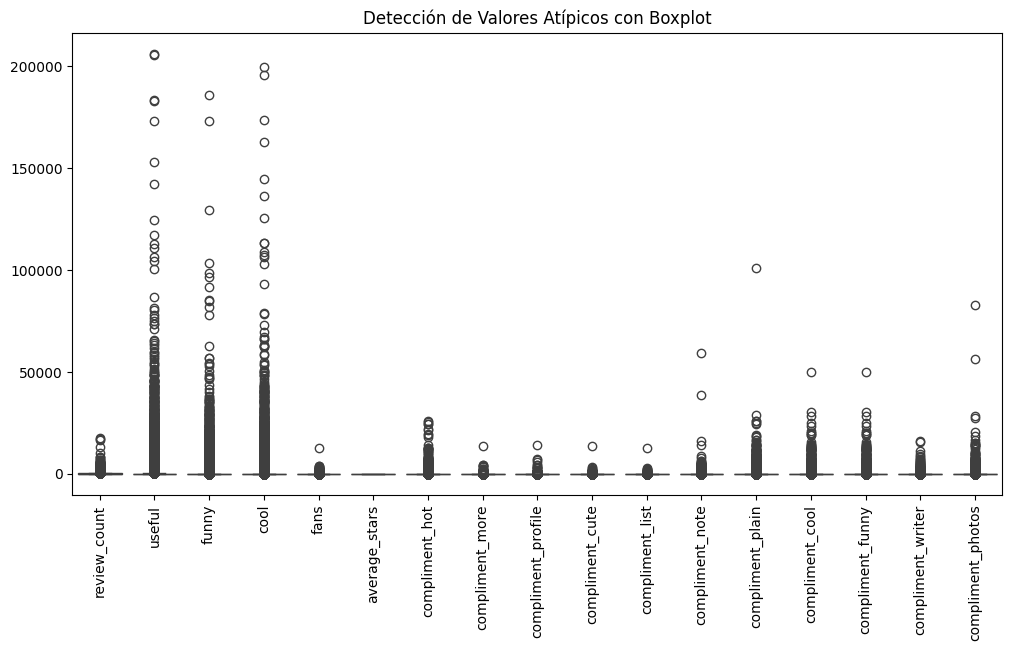

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear boxplots para todas las columnas numéricas
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura
sns.boxplot(data=df_user.select_dtypes(include=np.number))  # Seleccionamos solo columnas numéricas

# Agregar título y etiquetas
plt.title("Detección de Valores Atípicos con Boxplot")
plt.xticks(rotation=90)  # Rotar las etiquetas de las columnas si hay muchas
plt.show()


C:\Users\yanin\AppData\Local\Temp\ipykernel_15968\1201833372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user['yelping_since'] = pd.to_datetime(df_user['yelping_since'])
C:\Users\yanin\AppData\Local\Temp\ipykernel_15968\1201833372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user['year_joined'] = df_user['yelping_since'].dt.year


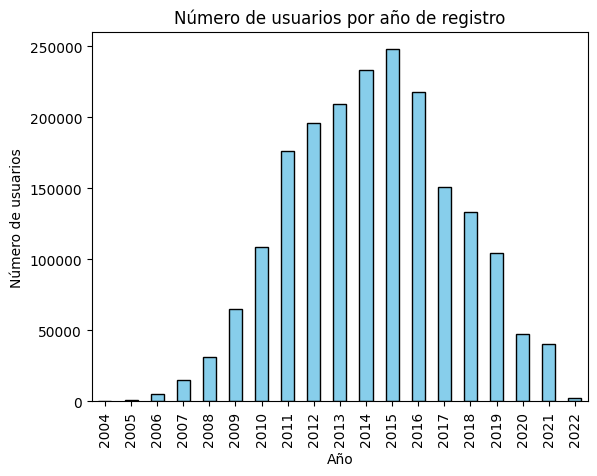

In [19]:
# Extraer el año de yelping_since
df_user['yelping_since'] = pd.to_datetime(df_user['yelping_since'])
df_user['year_joined'] = df_user['yelping_since'].dt.year

# Contar el número de usuarios por año
users_per_year = df_user['year_joined'].value_counts().sort_index()
users_per_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Número de usuarios por año de registro')
plt.xlabel('Año')
plt.ylabel('Número de usuarios')
plt.show()


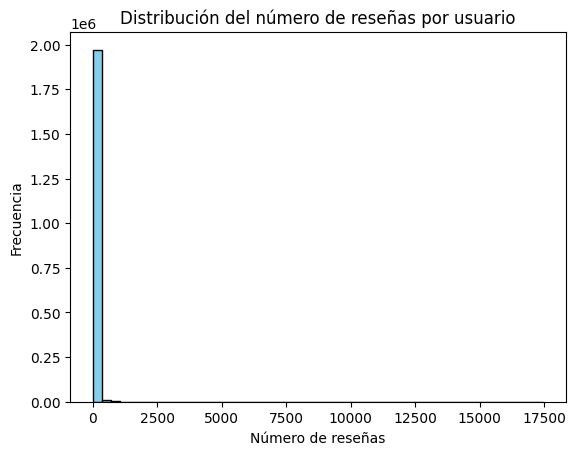

In [20]:
# Análisis de la distribución de reseñas
df_user['review_count'].describe()
df_user['review_count'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución del número de reseñas por usuario')
plt.xlabel('Número de reseñas')
plt.ylabel('Frecuencia')
plt.show()


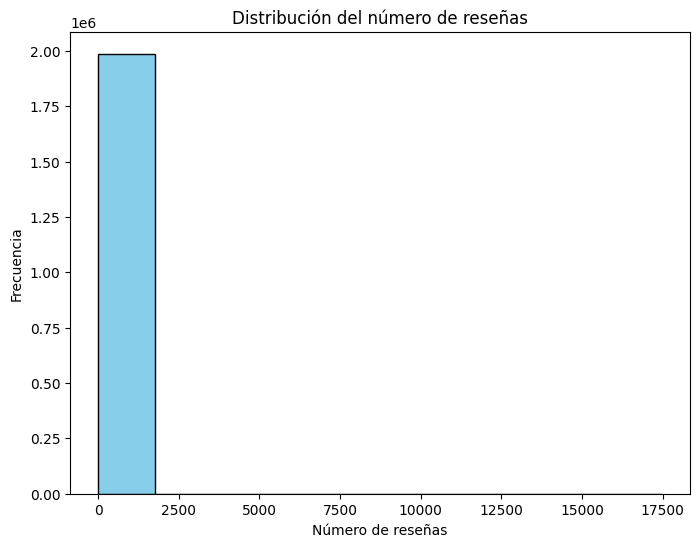

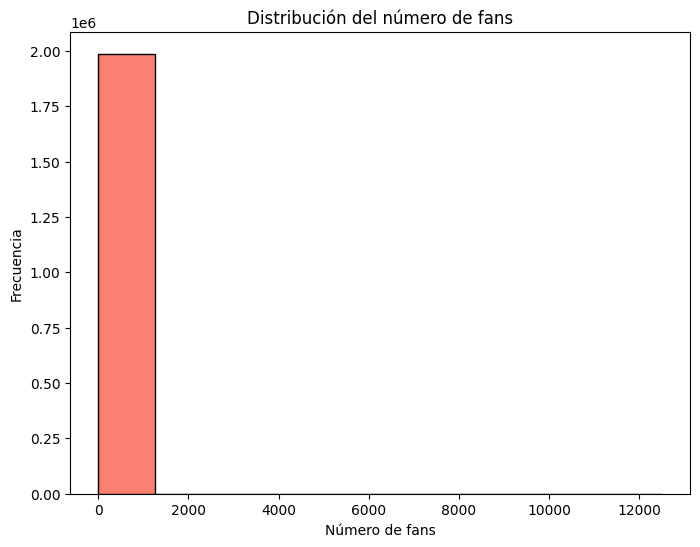

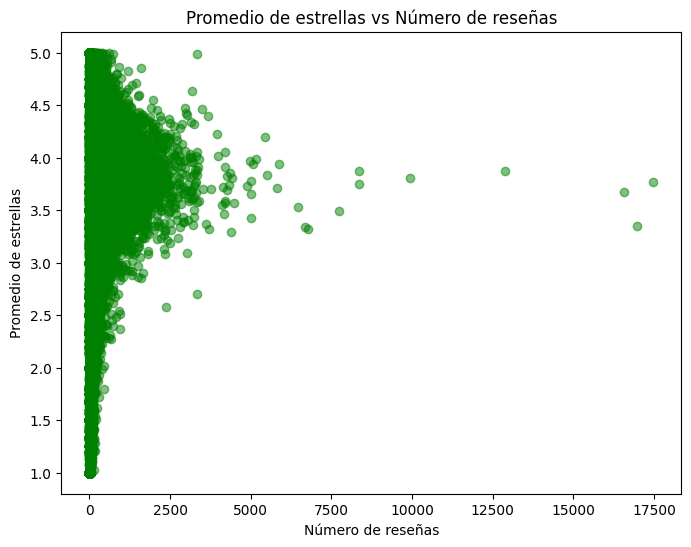

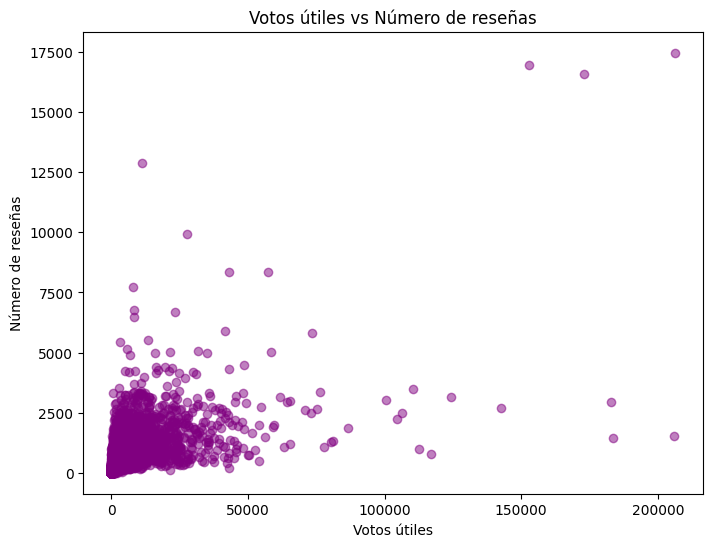


Amigos de Ha3iJu77CxlrFm-vQRs_8g:
Series([], Name: friends, dtype: object)


In [21]:



# Análisis de la distribución de algunas columnas
import matplotlib.pyplot as plt

# Histograma para 'review_count' (número de reseñas)
plt.figure(figsize=(8, 6))
df_user['review_count'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución del número de reseñas')
plt.xlabel('Número de reseñas')
plt.ylabel('Frecuencia')
plt.show()

# Histograma para 'fans' (número de fans)
plt.figure(figsize=(8, 6))
df_user['fans'].plot(kind='hist', bins=10, color='salmon', edgecolor='black')
plt.title('Distribución del número de fans')
plt.xlabel('Número de fans')
plt.ylabel('Frecuencia')
plt.show()

# Comparar 'average_stars' y 'review_count'
plt.figure(figsize=(8, 6))
plt.scatter(df_user['review_count'], df_user['average_stars'], color='green', alpha=0.5)
plt.title('Promedio de estrellas vs Número de reseñas')
plt.xlabel('Número de reseñas')
plt.ylabel('Promedio de estrellas')
plt.show()

# Ver si hay alguna relación entre los votos útiles y el número de reseñas
plt.figure(figsize=(8, 6))
plt.scatter(df_user['useful'], df_user['review_count'], color='purple', alpha=0.5)
plt.title('Votos útiles vs Número de reseñas')
plt.xlabel('Votos útiles')
plt.ylabel('Número de reseñas')
plt.show()

# Ver la lista de amigos de un usuario específico
user_id = "Ha3iJu77CxlrFm-vQRs_8g"
user_friends = df_user[df_user['user_id'] == user_id]['friends']
print(f"\nAmigos de {user_id}:")
print(user_friends)
